https://chatgpt.com/share/67167b45-83b0-800b-882f-af7994951554

# Run Baseline Model

# LOOK AT TEMP NOTE.TXT

In this competition, Kaggle is challenging you to build a model that predicts the total ride duration of taxi trips in **New York City**. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

<div id="toc"><h1>Table of Contents</h1></div>

<div id="backTotop" class="alert alert-block alert-info">
    <ol>
        <li><a href="#bsnobjcts">Business Objectives</a>
        </li>
        <li value="2"><a href="#dtprocess">Data preprocessing</a>
            <ol style="list-style-type:none;padding-left:0">
                <li>2.1 <a href="#remdplctval">Removing Duplicated Values</a></li>
                <li>2.2 <a href="#checkdatatypes">Checking and Converting Datatypes</a></li>
                <li>2.3 <a href="#splittrandevsets">Splitting the Dataset into Training, Test, Dev Sets</a></li>
                <li>2.4 <a href="#outliershandling">Detecting and Handling Outliers</a></li>
                <li>2.5 <a href="#detecmisval">Detecting and Imputing Missing Values</a></li>
            </ol>
        </li>
        <li><a href="#edavis">Exploratory Data Analysis (EDA) and Data Visualization</a>
            <ol style="list-style-type:none;padding-left:0">
                <li>3.1 <a href="#addbusobj">Addressing Business Objectives</a></li>
                <li>3.2 <a href="#unncols">Drop Unnecessary Columns</a></li>
                <li>3.3 <a href="#kmeansclus">K-means Clustering</a></li>
            </ol>
        </li>
        <li><a href="#feslecenginering">Feature Selection and Engineering</a>
    </ol>
</div>

<div id="bsnobjcts">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">1. Business Objectives</div>
</div>

1. What are the maximum, minimum, mean, count, and sum of trip durations from 2016?
2. What are the maximum, minimum, mean, and sum of distances from 2016?
3. What are the maximum, minimum, and mean of taxi speeds from 2016?
4. Do trip duration and distance have a linear relationship, such as v = s/t (where t is proportional to s)?
5. Which vendor had the largest number of trip duration in 2016?
6. Which vendor had the larger total distance in 2016?
7. What are the average taxi speeds for each vendor in 2016?
8. How many taxi trips were made by each vendor in 2016?
9. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?
10. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) during different parts of the day in 2016?
11. How many taxi trips were there on weekdays in 2016?
12. How many taxi trips were there each month in 2016?
13. What was the average distance covered by taxis for trips that were either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?
14. What was the average speed of taxis within a 24-hour period in 2016?
15. Was the number of passengers related to trip duration?
16. Did the number of passengers relate to the available vendors?
17. What was the operational area for taxi trips in 2016?
18. Which areas allowed taxis to send data in real-time?
19. Did the ability to send data in real-time affect taxi trip duration?
20. Did the ability to send data in real-time depend on how far or close the distance was?

<div id="dtprocess">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">2. Data preprocessing</div>
</div>

In [1]:
from utils import *

In [2]:
df = pd.read_csv("train.csv")

<div id="remdplctval">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.1 Removing Duplicated Values</div>
</div>

In [3]:
df.duplicated().sum().sum()

0

<div id="checkdatatypes">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.2 Checking and Converting Datatypes</div>
</div>

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.shape

(1458644, 11)

In [7]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

**distance, great_circle**

Let's calculate distance using the great circle method. A great circle is the shortest path between two points on the surface of a sphere. On Earth, this is often used for measuring distances between two locations based on their latitude and longitude. The method accounts for the curvature of the Earth and provides a more accurate distance than a straight line on a flat map (which would give the "as-the-crow-flies" distance).

In [8]:
df_subset = df.copy()

In [9]:
df_subset['distance_gc'] = df_subset.apply(calculate_distance_gc, axis=1)

In [10]:
df_subset.head()['distance_gc']

0    1.498523
1    1.805510
2    6.385108
3    1.485501
4    1.188590
Name: distance_gc, dtype: float64

In [11]:
df_subset['speed_gc'] = df_subset.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_gc']), axis=1)

From the data, we observe that the average speed is approximately 14.4 km/h. However, this calculation uses the `great_circle` function, which estimates the shortest distance between two points on a spherical surface, assuming the Earth is a perfect sphere. While this method provides a reasonable approximation for long distances, such as intercity or international travel, it can lead to inaccuracies over short distances, especially in urban environments. The `great_circle` method measures the straight-line distance, or "as the crow flies," which doesn't account for actual road networks, detours, obstacles, or geographic features.

To improve accuracy, it's necessary to calculate the actual road distance instead of relying on straight-line distance. Tools like OpenStreetMap (OSM) provide detailed road network data, enabling us to compute distances that reflect real-world driving paths. By integrating these road distances, we can recalculate the average speed to represent realistic travel routes and times, offering a more accurate depiction of vehicle movement.

In [12]:
df_subset.head()[['trip_duration', 'distance_gc', 'speed_gc']]

,trip_duration,distance_gc,speed_gc
0,455,1.498523,11.856445
1,663,1.805510,9.803673
2,2124,6.385108,10.822216
3,429,1.485501,12.465739
4,435,1.188590,9.836608


In [13]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df_subset.describe()['speed_gc'])

count   1458644.000
mean         14.423
std          14.978
min           0.000
25%           9.121
50%          12.792
75%          17.845
max        9274.850
Name: speed_gc, dtype: float64


**distance, osmnx**

Calculating actual road distances using OpenStreetMap (OSM) data with OSMNX library, which interfaces with OSM to get the network and calculate road distances.

In [14]:
df_subset = df_subset.copy().head(5)  # Take only the first 5 rows

In [15]:
df_subset

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_gc,speed_gc
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,9.803673
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,12.465739
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,9.836608


In [16]:
df_subset = cal_road_distance_osmnx(df_subset)

In [17]:
df_subset['speed_osmnx'] = df_subset.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_osmnx']), axis=1)

In [18]:
df_subset.iloc[:, -4:].head()

,distance_gc,speed_gc,distance_osmnx,speed_osmnx
0,1.498523,11.856445,1.967594,15.567777
1,1.805510,9.803673,2.500146,13.575453
2,6.385108,10.822216,7.239872,12.270969
3,1.485501,12.465739,1.708266,14.335099
4,1.188590,9.836608,1.747517,14.462210


The analysis using OpenStreetMap (OSM) data with the OSMnx library shows that the calculated average speed was only 14 km/hour. This result reflects the data from OSMnx, which is more focused on network structure and may not accurately represent real-world travel speeds, as it doesn't account for specific driving conditions such as traffic, road type, or speed limits.

To enhance the accuracy of our speed calculation, we will now compare this result with OSRM (Open Source Routing Machine). OSRM is a routing engine that uses OSM data but includes factors like actual road speeds, traffic rules, and driving conditions, providing a more realistic estimate of travel time and average speed. By comparing the results from both OSMnx and OSRM, we can determine the discrepancies and assess the impact of real-world conditions on travel speeds.

In [19]:
df_subset.describe()['speed_osmnx']

count     5.000000
mean     14.042302
std       1.219087
min      12.270969
25%      13.575453
50%      14.335099
75%      14.462210
max      15.567777
Name: speed_osmnx, dtype: float64

**distance, osrm**

In [20]:
df_subset = cal_road_distance_osrm(df_subset)

Processing row 0 of 5...


In [21]:
df_subset['speed_osrm'] = df_subset.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_osrm']), axis=1)

In [22]:
df_subset.iloc[:, -6:].head()

,distance_gc,speed_gc,distance_osmnx,speed_osmnx,distance_osrm,speed_osrm
0,1.498523,11.856445,1.967594,15.567777,2.1597,17.087736
1,1.805510,9.803673,2.500146,13.575453,2.5118,13.638733
2,6.385108,10.822216,7.239872,12.270969,9.9350,16.838983
3,1.485501,12.465739,1.708266,14.335099,1.7766,14.908531
4,1.188590,9.836608,1.747517,14.462210,1.6066,13.296000


In [23]:
df_subset.describe()['speed_osrm']

count     5.000000
mean     15.153997
std       1.759755
min      13.296000
25%      13.638733
50%      14.908531
75%      16.838983
max      17.087736
Name: speed_osrm, dtype: float64

**distance, google maps (manual)**

In [24]:
print(df_subset[["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude"]])

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -73.982155        40.767937         -73.964630         40.765602
1        -73.980415        40.738564         -73.999481         40.731152
2        -73.979027        40.763939         -74.005333         40.710087
3        -74.010040        40.719971         -74.012268         40.706718
4        -73.973053        40.793209         -73.972923         40.782520


speed = distance/time

- https://www.google.com/maps/dir/40.767937,-73.982155/40.765602,-73.964630
- distance1 = 2 km
- time1 = 5 mins

* https://www.google.com/maps/dir/40.738564,-73.980415/40.731152,-73.999481
* distance2 = 2.5 km
* time2 = 6 mins

- https://www.google.com/maps/dir/40.763939,-73.979027/40.710087,-74.005333
- distance3 = 11.1 km
- time3 = 16 mins

* https://www.google.com/maps/dir/40.719971,-74.010040/40.706718,-74.012268
* distance4 = 1.8 km
* time4 = 6 mins

- https://www.google.com/maps/dir/40.793209,-73.973053/40.782520,-73.972923
- distance5 = 1.6 km
- time5 = 4 mins

![gmaps](img/gmaps.png)

In [25]:
df_gmaps = {
    'time_gmaps': [5*60, 6*60, 16*60, 6*60, 4*60],
    'distance_gmaps': [2.0, 2.5, 11.1, 1.8, 1.6]
}

df_gmaps_df = pd.DataFrame(df_gmaps)

In [26]:
df_subset[['time_gmaps', 'distance_gmaps']] = df_gmaps_df[['time_gmaps', 'distance_gmaps']]

In [27]:
df_subset['speed_gmaps'] = df_subset.apply(lambda row: calculate_speed(row['time_gmaps'], row['distance_gmaps']), axis=1)

**Comparative Analysis**
- The distances calculated using the great-circle method (`distance_gc`) do not closely match the distances obtained from the OpenStreetMap network (`distance_osmnx`), OSRM (`distance_osrm`), and Google Maps (`distance_gmaps`).
- A significant issue arises when comparing `trip_duration` from our dataset with `time_gmaps` (estimated time from Google Maps), as discrepancies in these time measurements lead to substantial differences in calculated speeds.
- Specifically, the differences in trip durations affect the computed speeds, resulting in considerable variations. For instance, the speeds calculated from the great-circle method (`speed_gc`) show lower values compared to those from OpenStreetMap distances (`speed_osmnx`), OSRM (`speed_osrm`), and Google Maps (`speed_gmaps`).
- Notably, the speeds derived from OSMNX (`speed_osmnx`) and OSRM (`speed_osrm`) are generally more consistent and closely aligned with those from Google Maps (`speed_gmaps`). This alignment suggests that OSMNX and OSRM provide reliable estimates, making them preferable choices for further analysis. Their integration of real-world factors such as actual road conditions, traffic rules, and driving conditions enhances the accuracy of distances, setting them apart from the other methods.
- Additionally, it is important to note that we cannot use the Google Maps API due to its high cost. As we have identified that the primary issue lies in the **time discrepancies** rather than the distance measurements, it is prudent to utilize free open-source alternatives like OSRM. This approach not only mitigates costs but also maintains accuracy in our analysis.

In [28]:
df_subset[["trip_duration", "time_gmaps", "distance_gc", "distance_osmnx", "distance_osrm", "distance_gmaps", 
           "speed_gc", "speed_osmnx", "speed_osrm", "speed_gmaps"]]

,trip_duration,time_gmaps,distance_gc,distance_osmnx,distance_osrm,distance_gmaps,speed_gc,speed_osmnx,speed_osrm,speed_gmaps
0,455,300,1.498523,1.967594,2.1597,2.0,11.856445,15.567777,17.087736,24.000
1,663,360,1.805510,2.500146,2.5118,2.5,9.803673,13.575453,13.638733,25.000
2,2124,960,6.385108,7.239872,9.9350,11.1,10.822216,12.270969,16.838983,41.625
3,429,360,1.485501,1.708266,1.7766,1.8,12.465739,14.335099,14.908531,18.000
4,435,240,1.188590,1.747517,1.6066,1.6,9.836608,14.462210,13.296000,24.000


**recalculating distance using osmnx method**

In [29]:
# 50 sample
df_50 = df.copy()

In [30]:
df_50 = df_50.head(50)

In [31]:
%%time
df_50 = cal_road_distance_osmnx(df_50)

CPU times: total: 2min 32s
Wall time: 2min 34s


50 samples = 150 seconds

In [32]:
# the result is in second
(150/50)*1458644

4375932.0

In [33]:
(4375932/3600)/24

50.64736111111111

The estimated processing time for calculating distances is approximately **50 days**, which is not feasible. We can revisit this task later if we gain access to more efficient computational resources.

**recalculating distance using osrm method**

In [34]:
# 200 sample
df_200 = df.copy()

In [35]:
df_200 = df_200.head(200)

In [36]:
%%time
df_200 = cal_road_distance_osrm(df_200)

Processing row 0 of 200...
Processing row 100 of 200...
CPU times: total: 1.89 s
Wall time: 1min 52s


200 samples = 100 seconds

In [37]:
df.shape

(1458644, 11)

x / 1458644 = 100 seconds / 200 samples

In [38]:
# the result is in second
(100/200)*1458644

729322.0

In [39]:
(729322/3600)/24

8.441226851851852

The estimated processing time for the distance calculation is approximately **8 days**, which is impractical. 

It seems worthwhile to recalculate the distance using the OSRM method, which is more advanced and efficient compared to the OSMnx method. OSRM (Open Source Routing Machine) is specifically optimized for fast routing calculations on road networks, while OSMnx, although powerful for graph analysis and network extraction, can be slower for large-scale routing computations.

Given this, I decided to **install OSRM locally** and recalculate the distances using its more optimized algorithms for better performance.

**recalculating the distance using the OSRM method locally**

In [40]:
# %%time
# # running time = 4-5 hours
# df = cal_road_distance_osrm_local(df)

In [41]:
# df.to_csv('distance_osrm.csv', index=False)

In [42]:
df = pd.read_csv("distance_osrm.csv")

In [43]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  distance_osrm       1458627 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 133.5+ MB


In [45]:
df.shape

(1458644, 12)

**speed, osrm**

In [46]:
df['speed_osrm'] = df.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_osrm']), axis=1)

In [47]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,speed_osrm
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587,17.079824
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113,13.636018
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354,16.839661
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776,14.916923
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064,13.294345


In [48]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df.describe()["speed_osrm"])

count   1458627.000
mean         19.477
std          31.748
min           0.000
25%          12.361
50%          16.986
75%          23.253
max       12246.891
Name: speed_osrm, dtype: float64


Let's revisit our `df_subset` dataframe. As previously mentioned, a critical challenge emerges when we compare `trip_duration` from the dataset with `time_gmaps`, which represents the estimated duration from Google Maps. These discrepancies result in significant variations in the calculated speeds. Such variations may arise due to different factors: traffic conditions, taxi behavior (e.g., stopping for passengers), or road closures and detours not accounted for during the trip. These factors should be accounted for when interpreting results.

Furthermore, the average speed derived from `speed_osrm` is **19.47 km/h**. While this provides a baseline, it's important to contextualize this value against New York City's typical traffic patterns and speed limits. The city's congestion, frequent stops, and potential inefficiencies in routes mean that deviations from this average are expected. Therefore, it is crucial to assess whether this average aligns with realistic expectations for taxi travel in NYC.

**By further exploring** outliers or extreme deviations, we could uncover patterns or systemic issues in specific routes, times of day, or regions, enhancing the predictive power of our machine learning model.

In [49]:
df_subset[["trip_duration", "time_gmaps", "distance_osrm", "distance_gmaps", "speed_osrm", "speed_gmaps"]]

,trip_duration,time_gmaps,distance_osrm,distance_gmaps,speed_osrm,speed_gmaps
0,455,300,2.1597,2.0,17.087736,24.000
1,663,360,2.5118,2.5,13.638733,25.000
2,2124,960,9.9350,11.1,16.838983,41.625
3,429,360,1.7766,1.8,14.908531,18.000
4,435,240,1.6066,1.6,13.296000,24.000


**datetime**

In [50]:
df["pickup_datetime"].head()

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
Name: pickup_datetime, dtype: object

In [51]:
df = datetime_transform(df)

In [52]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,...,pickup_datetime_year,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_year,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587,...,2016,3,17,Monday,Evening,2016,3,17,Monday,Evening
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113,...,2016,6,0,Sunday,Early Morning,2016,6,0,Sunday,Early Morning
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354,...,2016,1,11,Tuesday,Morning,2016,1,12,Tuesday,Afternoon
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776,...,2016,4,19,Wednesday,Evening,2016,4,19,Wednesday,Evening
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064,...,2016,3,13,Saturday,Afternoon,2016,3,13,Saturday,Afternoon


**vendor_id**

In [53]:
df['vendor_id'] = df['vendor_id'].astype('object')

In [54]:
df['vendor_id'].unique()

array([2, 1], dtype=object)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   id                        1458644 non-null  object  
 1   vendor_id                 1458644 non-null  object  
 2   passenger_count           1458644 non-null  int64   
 3   pickup_longitude          1458644 non-null  float64 
 4   pickup_latitude           1458644 non-null  float64 
 5   dropoff_longitude         1458644 non-null  float64 
 6   dropoff_latitude          1458644 non-null  float64 
 7   store_and_fwd_flag        1458644 non-null  object  
 8   trip_duration             1458644 non-null  int64   
 9   distance_osrm             1458627 non-null  float64 
 10  speed_osrm                1458627 non-null  float64 
 11  pickup_datetime_year      1458644 non-null  int64   
 12  pickup_datetime_month     1458644 non-null  int64   
 13  pickup_datet

**pickup_datetime_year, dropoff_datetime_year**

Since the data only contains trips from a single year (2016), these features do not provide any variability or additional value for the machine learning model and should be dropped.

In [56]:
df["pickup_datetime_year"].unique()

array([2016], dtype=int64)

In [57]:
df["dropoff_datetime_year"].unique()

array([2016], dtype=int64)

In [58]:
df.drop(["pickup_datetime_year", "dropoff_datetime_year"], axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   id                        1458644 non-null  object  
 1   vendor_id                 1458644 non-null  object  
 2   passenger_count           1458644 non-null  int64   
 3   pickup_longitude          1458644 non-null  float64 
 4   pickup_latitude           1458644 non-null  float64 
 5   dropoff_longitude         1458644 non-null  float64 
 6   dropoff_latitude          1458644 non-null  float64 
 7   store_and_fwd_flag        1458644 non-null  object  
 8   trip_duration             1458644 non-null  int64   
 9   distance_osrm             1458627 non-null  float64 
 10  speed_osrm                1458627 non-null  float64 
 11  pickup_datetime_month     1458644 non-null  int64   
 12  pickup_datetime_hour      1458644 non-null  int64   
 13  pickup_datet

<div id="splittrandevsets">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.3 Splitting the Dataset into Training and Test Sets</div>
</div>

In [60]:
X = df.drop(columns="trip_duration", axis=1)
y = df["trip_duration"]

In [61]:
# train = 80%, test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = rst)

In [62]:
print(f"training shapes: {X_train.shape}, {y_train.shape}")
print(f"testing shapes: {X_test.shape}, {y_test.shape}")

training shapes: (1166915, 18), (1166915,)
testing shapes: (291729, 18), (291729,)


In [63]:
df = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [64]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

train shape: (1166915, 19)
test shape: (291729, 19)


---

In [65]:
df.to_csv('train_temp.csv', index=False) # index=False to avoid saving the index as a column
test.to_csv('test_temp.csv', index=False)

In [66]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

In [67]:
df = pd.read_csv('train_temp.csv')
test = pd.read_csv('test_temp.csv')

In [68]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period,trip_duration
0,id0458976,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,6,18,Wednesday,Evening,1133
1,id0434613,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,4,13,Monday,Afternoon,887
2,id3809234,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,5,12,Saturday,Afternoon,686
3,id1203705,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,5,18,Saturday,Evening,818
4,id1896645,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,4,23,Sunday,Night,951


In [69]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

train shape: (1166915, 19)
test shape: (291729, 19)


<div id="outliershandling">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.4 Detecting and Handling Outliers</div>
</div>

In the trip_duration column, we observe some suspiciously large maximum values. For example, the maximum value recorded is **3,526,282 seconds**, which translates to nearly **40 days** of trip duration. This is highly unusual for a taxi trip and likely represents erroneous data or outliers.

To better understand this, we can visualize the distribution of trip durations to see how these extreme values compare to the typical trip durations.

In [70]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df.describe())

        vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 1166915.000      1166915.000       1166915.000      1166915.000   
mean        1.535            1.664           -73.974           40.751   
std         0.499            1.314             0.076            0.033   
min         1.000            0.000          -121.933           34.360   
25%         1.000            1.000           -73.992           40.737   
50%         2.000            1.000           -73.982           40.754   
75%         2.000            2.000           -73.967           40.768   
max         2.000            9.000           -61.336           51.881   

       dropoff_longitude  dropoff_latitude  distance_osrm  speed_osrm  \
count        1166915.000       1166915.000    1166899.000 1166899.000   
mean             -73.973            40.752          4.618      19.489   
std                0.076             0.036          5.623      32.721   
min             -121.933            32.181        

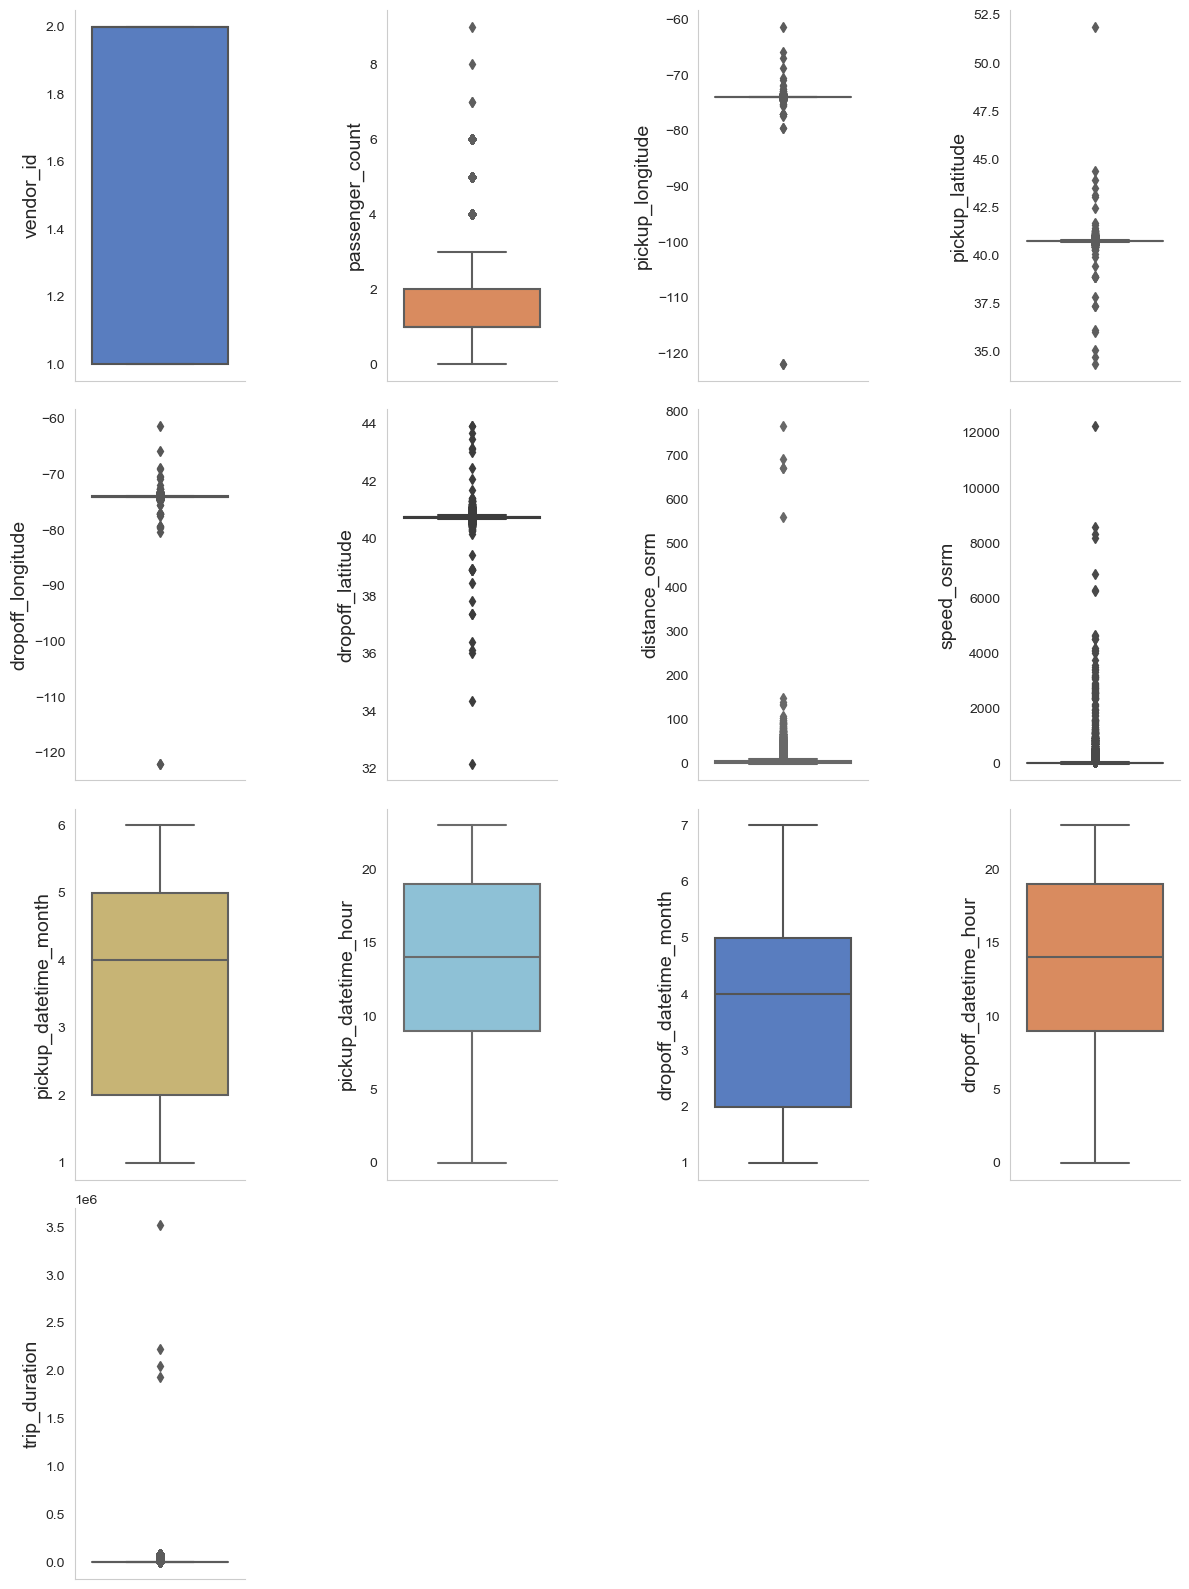

In [71]:
outliers_graph(df, df.columns.to_list())

**pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude**

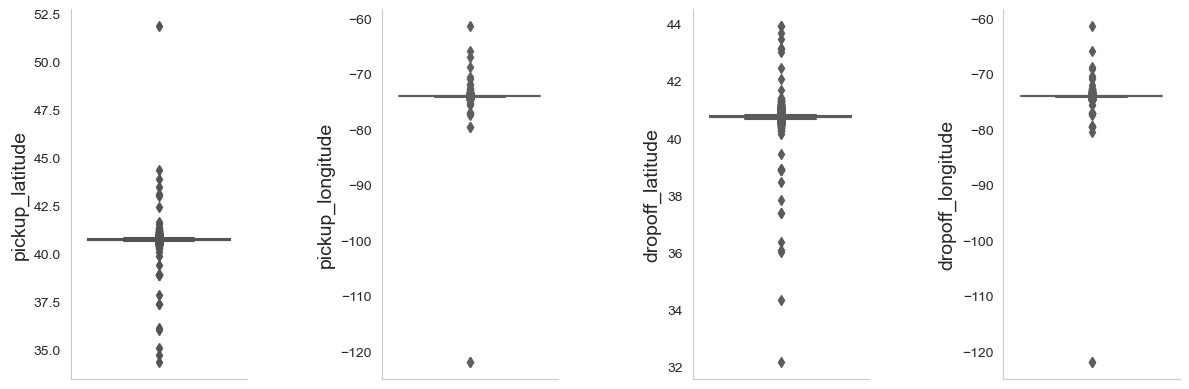

In [72]:
outliers_graph(df, ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"])

I will use the [NYC Taxi Zones dataset](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc) as a reference to focus my analysis on pickup and dropoff points within the commonly used NYC Taxi Zones. This dataset will help narrow the scope to typical taxi routes in New York City, ensuring the study remains within relevant geographic boundaries.

By operating under the assumption that most taxi trips occur within the city, this approach will better reflect realistic taxi trip patterns and filter out potential outliers or unusual trips that extend beyond the typical service area.

In [73]:
gdf = gpd.read_file('NYC Taxi Zones.geojson')

In [74]:
gdf.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."


In [75]:
gdf.shape

(263, 7)

In [76]:
# Resets all matplotlib settings globally to their defaults
plt.rcdefaults()

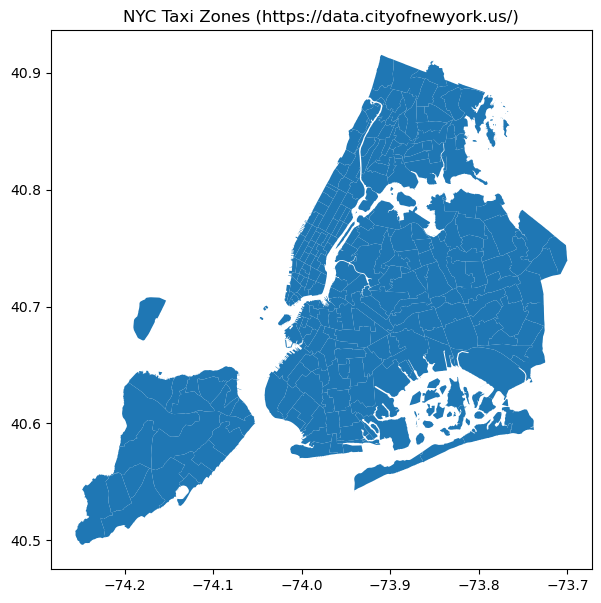

In [77]:
gdf.plot(figsize=(7, 7))
plt.title('NYC Taxi Zones (https://data.cityofnewyork.us/)')
x_limits = plt.gca().get_xlim()
y_limits = plt.gca().get_ylim()

In [78]:
# Ensure the boundary is in the correct CRS (WGS84 - EPSG:4326)
gdf_nyc_boundary = gdf.to_crs(epsg=4326)

In [79]:
# Reproject the boundary to a projected CRS (UTM zone 18N for NYC)
gdf_nyc_boundary_projected = gdf_nyc_boundary.to_crs(epsg=32618)

In [80]:
# Apply a small positive buffer to the NYC boundary in the projected CRS
# buffered_nyc_boundary_projected = gdf_nyc_boundary_projected.buffer(50)
# buffered_nyc_boundary_projected = gdf_nyc_boundary_projected.buffer(100)
buffered_nyc_boundary_projected = gdf_nyc_boundary_projected.buffer(500)  # Buffer in meters, adjust as needed

In [81]:
# Reproject back to WGS84 (EPSG:4326) for further analysis
buffered_nyc_boundary = buffered_nyc_boundary_projected.to_crs(epsg=4326)

In [82]:
# Create GeoDataFrame for pickup and dropoff points
gdf_pickup = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.pickup_longitude, df.pickup_latitude))
gdf_dropoff = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.dropoff_longitude, df.dropoff_latitude))

In [83]:
# Set the correct CRS (WGS84) for pickup and dropoff points
gdf_pickup.set_crs(epsg=4326, inplace=True);
gdf_dropoff.set_crs(epsg=4326, inplace=True);

In [84]:
len(gdf_pickup.index), len(gdf_dropoff.index)

(1166915, 1166915)

In [85]:
gdf_pickup_in_nyc = gpd.sjoin(gdf_pickup, gpd.GeoDataFrame(geometry=buffered_nyc_boundary), predicate='within', how='inner')
gdf_pickup_in_nyc = gdf_pickup_in_nyc[~gdf_pickup_in_nyc.index.duplicated(keep='first')]

gdf_dropoff_in_nyc = gpd.sjoin(gdf_dropoff, gpd.GeoDataFrame(geometry=buffered_nyc_boundary), predicate='within', how='inner')
gdf_dropoff_in_nyc = gdf_dropoff_in_nyc[~gdf_dropoff_in_nyc.index.duplicated(keep='first')]

In [86]:
len(gdf_pickup_in_nyc.index), len(gdf_dropoff_in_nyc.index)

(1166244, 1164332)

In [87]:
gdf_pickup_in_nyc.index.duplicated().sum(), gdf_dropoff_in_nyc.index.duplicated().sum()

(0, 0)

**Index Flow**

`gdf_pickup`: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

`gdf_pickup_in_nyc`: 1, 2, 3, 4, 5, 6, 7, 8

`gdf_pickup_dropoff_in_nyc`: 1, 2, 3, 4, 5, 6

`gdf_pickup_in_nyc_new`: 1, 2, 3, 4, 5, 6

In [88]:
# Filter rows where both pickup and dropoff points are within NYC
gdf_pickup_dropoff_in_nyc = gdf_pickup_in_nyc[gdf_pickup_in_nyc.index.isin(gdf_dropoff_in_nyc.index)]

In [89]:
# Filter rows where both pickup and dropoff points are outside NYC
gdf_pickup_out_nyc = gdf_pickup[~gdf_pickup.index.isin(gdf_pickup_in_nyc.index)]
gdf_dropoff_out_nyc = gdf_dropoff[~gdf_dropoff.index.isin(gdf_dropoff_in_nyc.index)]

gdf_pickup_dropoff_out_nyc = gdf_pickup_out_nyc[gdf_pickup_out_nyc.index.isin(gdf_dropoff_out_nyc.index)]

In [90]:
# Pickup points inside NYC
gdf_pickup_in_nyc_new = gdf_pickup[gdf_pickup.index.isin(gdf_pickup_dropoff_in_nyc.index)]

# Dropoff points inside NYC
gdf_dropoff_in_nyc_new = gdf_dropoff[gdf_dropoff.index.isin(gdf_pickup_dropoff_in_nyc.index)]

# Pickup points outside NYC
gdf_pickup_out_nyc_new = gdf_pickup[gdf_pickup.index.isin(gdf_pickup_dropoff_out_nyc.index)]

# Dropoff points outside NYC
gdf_dropoff_out_nyc_new = gdf_dropoff[gdf_dropoff.index.isin(gdf_pickup_dropoff_out_nyc.index)]

In [91]:
# %%time
# # running time = 2-5 mins
# add_plot(gdf_pickup_in_nyc_new, gdf_pickup_out_nyc_new, 'Pickup within NYC', 'Pickup outside NYC'
#          , filename='NYC Pickup Locations.png', x_limits=x_limits, y_limits=y_limits)

![nyc pickup locations](img/nyc_pickup_locations.png)

In [92]:
# %%time
# # running time = 2-5 mins
# add_plot(gdf_dropoff_in_nyc_new, gdf_dropoff_out_nyc_new, 'Dropoff within NYC', 'Dropoff outside NYC'
#          , filename='NYC Dropoff Locations.png', x_limits=x_limits, y_limits=y_limits)

![nyc dropoff locations](img/nyc_dropoff_locations.png)

Because `gdf_pickup_in_nyc_new` and `gdf_dropoff_in_nyc_new` differ only in the `geometry` column, we can drop that column and use one of them as the DataFrame.

In [93]:
len(gdf_pickup_in_nyc_new.index), len(gdf_dropoff_in_nyc_new.index)

(1164295, 1164295)

In [94]:
len(gdf_pickup_out_nyc_new.index), len(gdf_dropoff_out_nyc_new.index)

(634, 634)

In [95]:
gdf_pickup_in_nyc_new.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period,trip_duration,geometry
0,id0458976,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,6,18,Wednesday,Evening,1133,POINT (-73.86276 40.76882)
1,id0434613,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,4,13,Monday,Afternoon,887,POINT (-73.95804 40.78324)
2,id3809234,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,5,12,Saturday,Afternoon,686,POINT (-73.96946 40.78552)
3,id1203705,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,5,18,Saturday,Evening,818,POINT (-73.98174 40.73655)
4,id1896645,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,4,23,Sunday,Night,951,POINT (-73.97791 40.75261)


In [96]:
gdf_dropoff_in_nyc_new.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period,trip_duration,geometry
0,id0458976,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,6,18,Wednesday,Evening,1133,POINT (-73.89170 40.74669)
1,id0434613,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,4,13,Monday,Afternoon,887,POINT (-73.97551 40.76085)
2,id3809234,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,5,12,Saturday,Afternoon,686,POINT (-73.98924 40.77175)
3,id1203705,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,5,18,Saturday,Evening,818,POINT (-73.99835 40.72644)
4,id1896645,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,4,23,Sunday,Night,951,POINT (-73.97565 40.73314)


In [97]:
type(gdf_pickup_in_nyc_new)

geopandas.geodataframe.GeoDataFrame

In [98]:
outliers_area = gdf_pickup_out_nyc_new.shape[0] / df.shape[0] * 100
print(f'I have removed {outliers_area:.2f}% of outliers from the pickup dan dropoff points in the dataset.')

I have removed 0.05% of outliers from the pickup dan dropoff points in the dataset.


In [99]:
gdf_pickup_in_nyc_new = gdf_pickup_in_nyc_new.copy()

In [100]:
df = pd.DataFrame(gdf_pickup_in_nyc_new.drop(columns="geometry", axis=1))

In [101]:
type(df)

pandas.core.frame.DataFrame

**trip_duration**

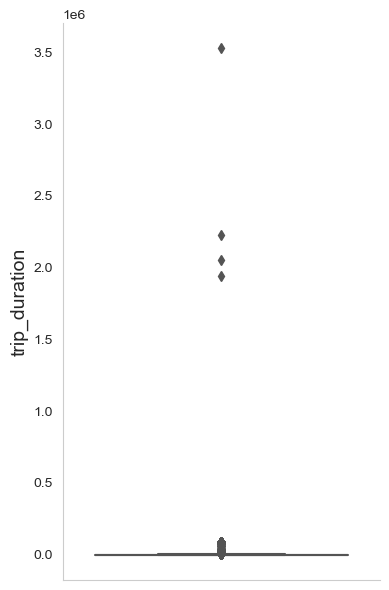

In [102]:
outliers_graph(df, ["trip_duration"])

**maximum trip duration**

In this dataframe below, we observe that one of the trip_duration values is **1,939,736 seconds**, which translates to approximately **22 days**. This is highly unusual for typical taxi trips, as such long durations are likely outliers or data errors. To maintain a more accurate and representative dataset, we should remove these extreme outliers.

In [103]:
df[df["trip_duration"] > 1.5 * 10**6][['id','trip_duration']]

,id,trip_duration
487117,id1325766,2227612
916993,id0053347,3526282
936804,id0369307,2049578
1104710,id1864733,1939736


In [104]:
df = df[df["trip_duration"] <= 1.5 * 10**6]

In [105]:
# check again
df[df["trip_duration"] > 1.5 * 10**6][['id','trip_duration']].count()

id               0
trip_duration    0
dtype: int64

In [106]:
df["trip_duration"].max()

86392

In [107]:
# in hour
df["trip_duration"].max()/3600

23.997777777777777

**minimum trip duration**

For the minimum trip duration, let's limit it to only include trips above 200 seconds, because trips below 200 seconds are often too short to be realistic. Such short trips could represent errors, incomplete trips, or anomalies like immediate cancellations or very short distances that are not typical of standard taxi trips. Additionally, since we have derived speed from the trip's duration and distance, any outliers or errors in the trip duration will directly impact the accuracy of the calculated speed.

In [108]:
df[df["trip_duration"] <= 200][['id','trip_duration']].count()

id               74130
trip_duration    74130
dtype: int64

In [109]:
df = df[df["trip_duration"] > 200]

In [110]:
# check again
df[df["trip_duration"] <= 200][['id','trip_duration']].count()

id               0
trip_duration    0
dtype: int64

In [111]:
df["trip_duration"].min()

201

**distance_osrm**

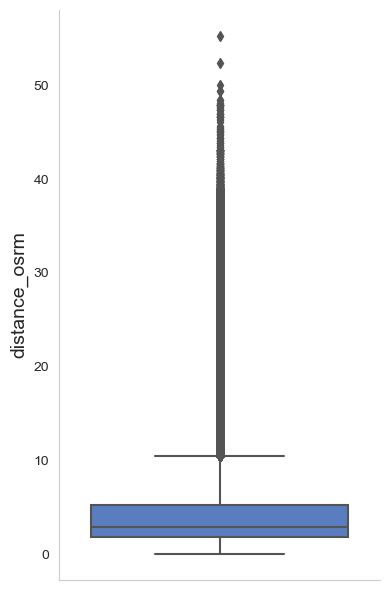

In [112]:
outliers_graph(df, ["distance_osrm"])

I will classify taxi trips with distances less than or equal to 200 meters (0.2 km) as outliers and remove them from the dataset. This classification is based on the fact that such distances are highly improbable for a typical taxi ride.

A distance of 200 meters or less is extremely short and may not allow enough time for the taxi to move between passengers, reach the next block, or justify the trip. Additionally, many taxi services have minimum fare policies or distance thresholds, making such short trips unrealistic. Therefore, these observations are likely data entry errors or rare exceptions and should be excluded from further analysis to ensure the accuracy and relevance of the results.

In [113]:
df[df["distance_osrm"] <= 0.2][['id','distance_osrm']].count()

id               3904
distance_osrm    3904
dtype: int64

In [114]:
df = df[df["distance_osrm"] > 0.2]

In [115]:
# check again
df[df["distance_osrm"] <= 0.2][['id','distance_osrm']].count()

id               0
distance_osrm    0
dtype: int64

In [116]:
df["distance_osrm"].min()

0.2002

In [117]:
df["distance_osrm"].max()

55.275400000000005

**speed_osrm**

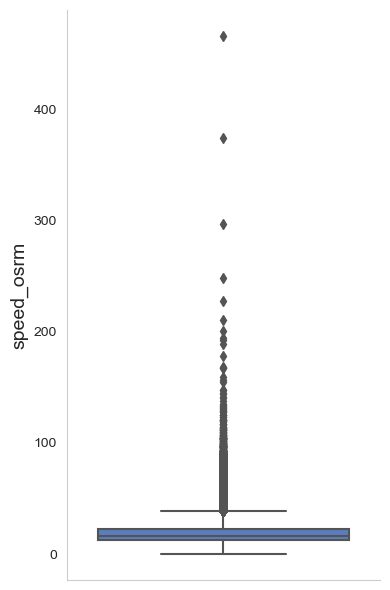

In [118]:
outliers_graph(df, ['speed_osrm'])

**maximum speed**

Since the taxi speed is calculated independently using the formula v = s/t (where speed v is derived from the distance s traveled divided by the trip duration t), we can set a reasonable limit based on safety, legal regulations, and practical vehicle performance.

Speeds above 150 km/h are generally outliers and can be considered unrealistic for the following reasons:
- Safety concerns: Driving at such high speeds significantly increases the risk of accidents. Taxis are typically expected to prioritize passenger safety and comfort over speed.
- Legal restrictions: In most urban and highway environments, speed limits are set well below 150 km/h. Exceeding these limits is illegal and could result in penalties or license suspension for drivers.
- Vehicle design: Standard taxi vehicles are not designed to sustain such high speeds for long periods. Taxi fleets are often chosen for reliability, efficiency, and fuel economy, not high-speed performance.
- Passenger experience: Traveling at excessive speeds can be uncomfortable and undesirable for passengers, making it impractical for taxi drivers to maintain speeds above 150 km/h.

In [119]:
df[df["speed_osrm"] > 150][['id','speed_osrm']].count()

id            17
speed_osrm    17
dtype: int64

In [120]:
df = df[df["speed_osrm"] <= 150]

In [121]:
df[df["speed_osrm"] > 150][['id','speed_osrm']].count()

id            0
speed_osrm    0
dtype: int64

In [122]:
df["speed_osrm"].max()

147.7554929577465

**minimum speed**

I also set the lower bound limit for speed to 5 km/h because speeds below this threshold are likely to represent extreme congestion, prolonged idling, or abnormal conditions such as extended stops, which are not reflective of typical taxi movement patterns in NYC. By setting this limit, I aim to filter out outliers that could skew the analysis of average taxi speeds.

In [123]:
df[df["speed_osrm"] < 5][['id','speed_osrm']].count()

id            14874
speed_osrm    14874
dtype: int64

In [124]:
df = df[df["speed_osrm"] >= 5]

In [125]:
# check again
df[df["speed_osrm"] < 5][['id','speed_osrm']].count()

id            0
speed_osrm    0
dtype: int64

In [126]:
df["speed_osrm"].min()

5.0

---

**Outlier Removal Conclusion**
- I have removed a total of 8.19% of outliers from the dataset to ensure the integrity and accuracy of the analysis.
-  A good range for outlier detection typically removes 5-10% of extreme values, depending on the data quality and context. In this case, removing 8.19% of the dataset is appropriate for a large urban taxi system like NYC, where extreme trips (too short, too long, too fast, or too slow) could distort the results. It still retains enough data for a robust analysis of normal taxi operations.

In [127]:
(1166915 - df.shape[0])/1166915*100

8.188257070994888

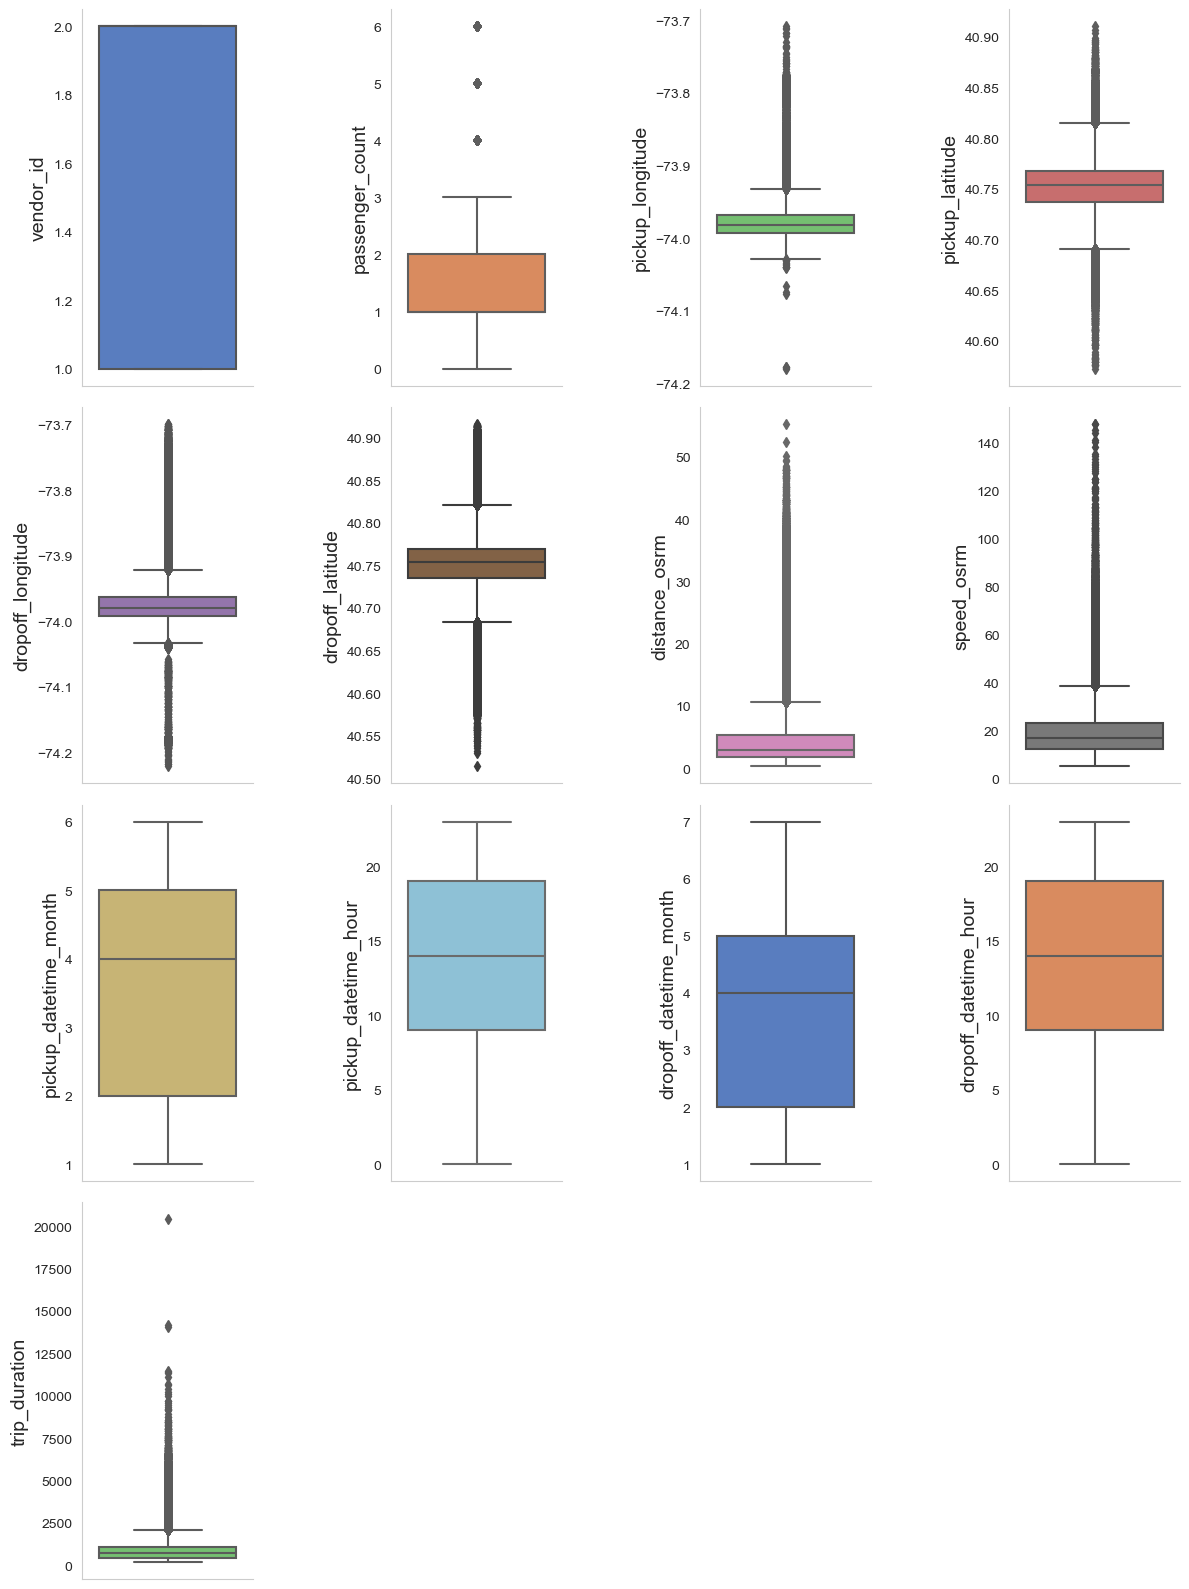

In [128]:
outliers_graph(df, df.columns.to_list())

<div id="detecmisval">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.5 Detecting and Imputing Missing Values</div>
</div>

In [129]:
df.isnull().sum().sum()

0

---

In [130]:
df.to_csv('train_temp2.csv', index=False) # index=False to avoid saving the index as a column
test.to_csv('test_temp2.csv', index=False)

In [131]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

In [2]:
df = pd.read_csv('train_temp2.csv')
test = pd.read_csv('test_temp2.csv')

In [3]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period,trip_duration
0,id0458976,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,6,18,Wednesday,Evening,1133
1,id0434613,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,4,13,Monday,Afternoon,887
2,id3809234,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,5,12,Saturday,Afternoon,686
3,id1203705,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,5,18,Saturday,Evening,818
4,id1896645,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,4,23,Sunday,Night,951


In [4]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

train shape: (1071365, 19)
test shape: (291729, 19)


<div id="edavis">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">3. Exploratory Data Analysis (EDA) and Data Visualization</div>
</div>

<div id="addbusobj">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">3.1 Addressing Business Objectives</div>
</div>

**1. What are the maximum, minimum, mean, count, and sum of trip durations from 2016?**

**Data Observation**
- Maximum trip duration (before outlier removal) = 3,526,282 seconds = 40 days
- Maximum trip duration (after outlier removal) = 20,400 seconds = 5.67 hours
- Minimum trip duration (before outlier removal)  = 1 second
- Minimum trip duration (after outlier removal)  = 201 seconds
- Mean trip duration (before outlier removal) = 959 seconds = 15.9 minutes
- Mean trip duration (after outlier removal) = 878 seconds = 14.6 minutes
- Total number of trips (Count) = 1,071,365 orders
- Total trip duration (Sum) = 261,147 hours

**Analysis**
- The maximum trip duration drastically reduced from 40 days to 5.67 hours after outlier removal. This suggests that there were extreme values in the data that were likely errors or anomalies, making the trip duration unreasonable for typical taxi trips in a city.
- The minimum trip duration increased from 1 second to 201 seconds after outlier removal. A trip duration of 1 second is not feasible for a real-world scenario, and removing such extreme outliers helps in making the data more realistic.
- The mean trip duration also slightly reduced from 15.9 minutes to 14.6 minutes, indicating that a small portion of the trips had unusually long durations that skewed the average before outlier removal.
- A total of 1,071,365 trips were analyzed, contributing to a total trip duration of 261,147 hours. This provides a substantial amount of data for analysis, giving us confidence in the trends and patterns observed.

**Recommendation**
- Establish a system for regularly monitoring and flagging outliers in the dataset. Trips with extremely long or short durations (such as 40 days or 1 second) should be flagged for further review to ensure data quality and accuracy.
- The presence of extreme outliers indicates potential issues with data collection processes (e.g., errors in trip start or end times). Implementing stricter validation rules at the point of data entry can help prevent these errors from occurring.
- With the average trip duration being 14.6 minutes after cleaning, the company could explore route optimization strategies to reduce trip time further. This would improve customer satisfaction and reduce operational costs.

In [5]:
with pd.option_context('display.float_format', '{:.1f}'.format):
    print(df['trip_duration'].describe())

count   1071365.0
mean        877.5
std         645.4
min         201.0
25%         441.0
50%         697.0
75%        1103.0
max       20400.0
Name: trip_duration, dtype: float64


In [6]:
df['trip_duration'].sum() / 3600

261147.32666666666

**2. What are the maximum, minimum, mean, and sum of distances from 2016?**

**Data Observation**
- Maximum distance (before outlier removal) = 765.644 km
- Maximum distance (after outlier removal) = 55.275 km
- Minimum distance (before outlier removal) = 0 km
- Minimum distance (after outlier removal) = 0.290 km
- Mean distance (before outlier removal) = 4.618 km
- Mean distance (after outlier removal) = 4.894 km
- Total distance traveled (Sum) = 5,243,298 km

**Analysis**
- The maximum distance observed after removing outliers (55.275 km) is significantly more reasonable compared to the initial maximum (765.644 km). Considering New York City's geographic limits, where the distance between the farthest points is approximately 50 to 60 km (e.g., from the Bronx to Staten Island or JFK Airport), the original value of 765.644 km is clearly an anomaly. The adjusted value reflects more realistic taxi trip distances within the city.
- The minimum distance changed from 0 km to 0.290 km. This is likely due to the removal of trips that erroneously recorded zero distance, possibly due to data entry errors or trips that were canceled. The new minimum is more realistic, representing very short trips.
- The mean distance increased slightly from 4.618 km to 4.894 km after outlier removal. This reflects a more accurate representation of typical taxi trip lengths after removing extreme values that were skewing the original calculation.
- The total distance traveled of 5,243,298 km reflects the combined travel distance of all trips in the dataset. These metrics provide a strong baseline for assessing trip frequency and overall demand.

**Recommendation**
- Implement automated outlier detection systems to continuously monitor and filter out unrealistic trip distances, such as the original maximum of 765.644 km. This can improve the accuracy of distance metrics and provide more actionable insights for stakeholders.
- Investigate trips with minimal distances, especially those under 1 km, to ensure data accuracy. Consider flagging or excluding trips that might be erroneous or result from system errors, such as trips recorded as 0 km due to incorrect GPS readings or cancellations.
- Perform a more in-depth analysis of trips exceeding 50 km to better understand their frequency, origins, and destinations. These may represent rides to airports or neighboring cities, which could be opportunities for targeted promotions or services.

In [7]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df['distance_osrm'].describe())

count   1071365.000
mean          4.894
std           5.446
min           0.290
25%           1.873
50%           2.976
75%           5.350
max          55.275
Name: distance_osrm, dtype: float64


In [8]:
df['distance_osrm'].sum()

5243298.449

**3. What are the maximum, minimum, and mean of taxi speeds from 2016?**

**Data Observation**
- Maximum speed (before outlier removal) = 12,246 km/h
- Maximum speed (after outlier removal) = 147 km/h
- Minimum speed (before outlier removal) = 0 km/h
- Minimum speed (after outlier removal) = 5 km/h
- Mean speed (before outlier removal) = 19.489 km/h
- Mean speed (after outlier removal) = 19.024 km/h

**Analysis**
- The maximum speed before outlier removal was 12,246 km/h, which is clearly an unrealistic value for any vehicle, let alone a taxi in an urban environment. After outlier removal, the maximum speed is reduced to 147 km/h. Although 147 km/h is still high, it is more plausible and could be due to a taxi speeding on a highway or expressway, especially during off-peak hours.
- The minimum speed before outlier removal was 0 km/h, which may represent instances where the taxi was stationary for an extended period (e.g., at traffic lights or due to congestion). After outlier removal, the minimum speed increased to 5 km/h, indicating that trips with no meaningful movement have been filtered out. A minimum speed of 5 km/h is reasonable for urban traffic conditions, especially during peak hours or in congested areas.
- The mean speed decreased slightly from 19.489 km/h to 19.024 km/h after removing outliers. This suggests that the presence of extreme values (both high and low speeds) had a small but noticeable effect on the overall distribution. The mean speed of around 19 km/h is typical for taxis in New York City, where traffic, stop-and-go patterns, and speed limits influence overall travel speeds.

**Recommendation**
- The mean speed of 19.024 km/h is consistent with urban traffic conditions. However, strategies such as optimizing routes through real-time traffic data, avoiding known congestion zones, or promoting off-peak travel can help improve average speeds. This can reduce overall trip times and improve fuel efficiency.
- Examining speed variations during different times of day or week can help identify patterns, such as peak-hour traffic bottlenecks or smoother traffic flows at night. This can inform decisions about driver scheduling, route optimization, and pricing strategies for high-demand periods.

In [9]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df['speed_osrm'].describe())

count   1071365.000
mean         19.024
std           9.780
min           5.000
25%          12.448
50%          16.849
75%          22.872
max         147.755
Name: speed_osrm, dtype: float64


**4. Do trip duration and distance have a linear relationship, such as v = s/t (where t is proportional to s)?**

**Analysis**
- The relationship between trip duration and distance does not follow a strictly linear pattern as would be expected from the equation v = s/t (where s is distance and t is time). Instead, there is a triangular distribution where trip duration increases with distance up to a certain point (around 20-30 km). After this, the spread become more scattered and less predictable.
- The absence of a strictly linear relationship between distance and time suggests that as trip distances grow, the average speed might fluctuate significantly. Factors like congestion, traffic signals, and road conditions in urban settings likely play a major role in slowing down trips, especially at peak distances.
- For distances under 20 km, there is considerable variability in trip duration. Trips of similar distances show widely differing durations, indicating the influence of external factors such as traffic, road conditions, weather, or driver behavior.
- There is a significant density of points with durations less than 1 hour (up to ~3,600 seconds) and distances between 10 and 30 km, indicating that most trips fall within this range.
- For distances above 30 km, there are fewer data points, and the duration tends to decrease in density, possibly because of fewer long-distance trips or because efficient routes are used for these longer journeys.
- There are some notable outliers for trips exceeding 3 hours or covering distances greater than 40 km. These could be long-haul trips influenced by significant disruptions, such as accidents, road closures, or weather conditions. 

**Recommendation**
- Given the non-linear relationship between trip duration and distance, optimizing route suggestions using sophisticated routing algorithms that incorporate real-time traffic data and predictive analytics could help improve trip efficiency, particularly for longer routes.
- The clustering of trips between 10 and 30 km presents an opportunity for operational focus. Enhancing services and optimizing routes within this core distance could have the greatest impact on improving efficiency and customer satisfaction.

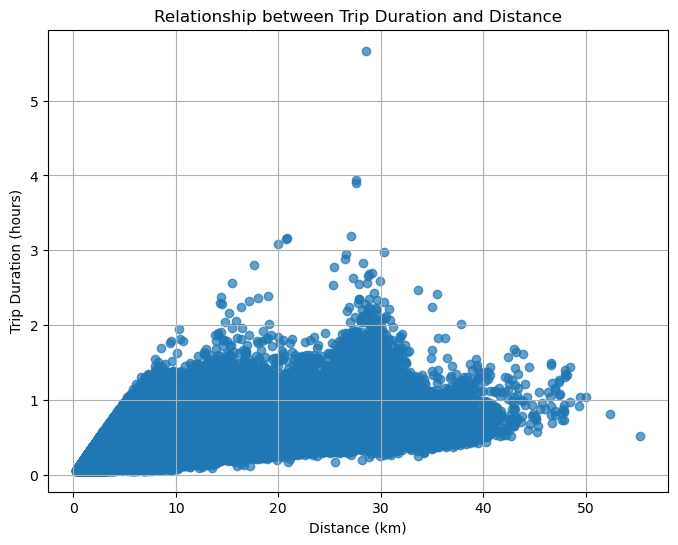

In [10]:
plot_trip_duration_vs_distance(df)

**5. Which vendor had the largest number of trip duration in 2016?**

**Analysis**
- Vendor 2, because they had 140,273 hours of total trip duration, while Vendor 1 only had 120,874 hours of total trip duration.

**Recommendation**
- Given the largest number of trip durations associated with Vendor 2, it may be beneficial for the company to further investigate the factors contributing to this difference. Analyzing aspects such as route efficiency, driver behavior, and customer preferences could provide insights into optimizing trip durations. Additionally, consider exploring partnerships with Vendor 2 for improved service offerings, or assess whether Vendor 1 can implement strategies to enhance their trip durations.

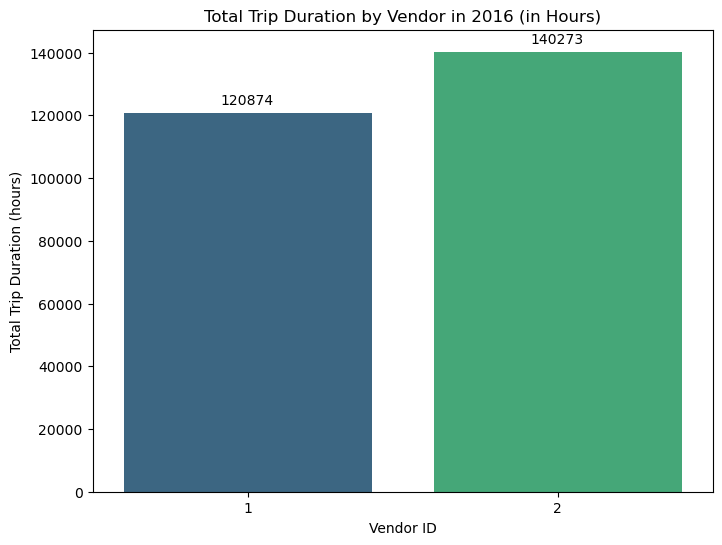

In [11]:
plot_vendor_trip_duration(df)

**6. Which vendor had the larger total distance in 2016?**

**Analysis**
- Vendor 2 outperformed Vendor 1 in terms of total distance traveled, covering 2,832,569 kilometers, while Vendor 1 covered 2,410,730 kilometers. This gap suggests that Vendor 2 managed a higher volume of trips or covered longer distances per trip during the year.
- Vendor 2's total distance is approximately 17.5% greater than that of Vendor 1.

**Recommendation**
- Since Vendor 2 has a higher total distance, it's crucial to investigate the factors contributing to this difference. Consider evaluating their operational efficiency, driver performance, and fleet size. Understanding their processes could offer insights into improving Vendor 1’s performance.
- While Vendor 2 covers more distance, it is important to check whether this leads to proportionally higher revenues or if it introduces higher operational costs. Profitability should not be compromised by merely increasing distance.

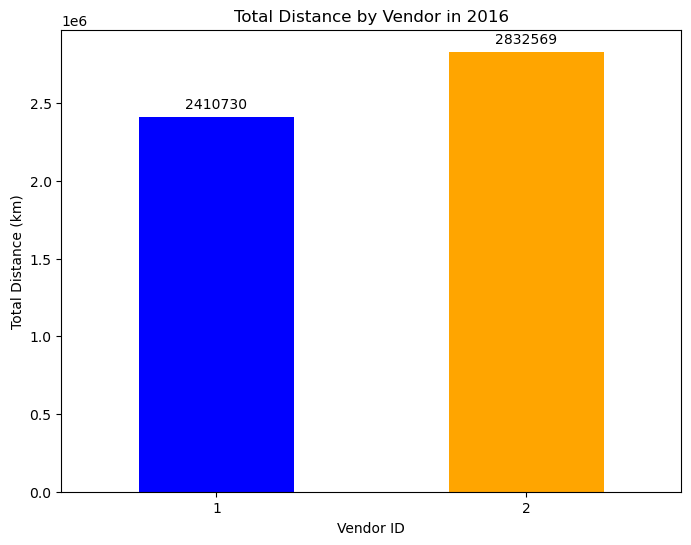

In [12]:
plot_total_distance_by_vendor(df)

**7. What are the average taxi speeds for each vendor in 2016?**

**Analysis**
- Vendor 2 demonstrates a slightly higher average speed (19.07 km/h) compared to Vendor 1 (18.97 km/h). This difference, though small, could indicate minor variations in factors like traffic conditions, driver behavior, route optimizations, or geographical coverage.
- The combined average speed for both vendors is 19.02 km/h, which aligns closely with both individual vendors' speeds, showing a general consistency in operational performance.

**Recommendation**
- Comparing the average speed of 19.02 km/h with industry standards or peer companies could help determine whether this performance is competitive. If it is below the industry average, consider strategies to improve speed without compromising service quality.
- Ensure that increasing speeds does not compromise passenger safety or comfort. Monitoring safety metrics alongside speed improvements is crucial to maintaining a positive customer experience.

In [13]:
avg_speed_all_vendors = df['speed_osrm'].mean()
avg_speed_all_vendors = pd.DataFrame({'Average Speed (km/h) (All Vendors) ': [avg_speed_all_vendors]})
avg_speed_all_vendors

,Average Speed (km/h) (All Vendors)
0,19.024482


In [14]:
average_speeds = df.groupby('vendor_id')['speed_osrm'].mean().reset_index()
average_speeds.columns = ['Vendor ID', 'Average Speed (km/h)']
average_speeds

,Vendor ID,Average Speed (km/h)
0,1,18.970324
1,2,19.071649


**8. How many taxi trips were made by each vendor in 2016?**

**Analysis**
- Number of trips = 1,071,365
- Number of Taxi trips per Vendor:
    - Vendor 1: 498,722
    - Vendor 2: 572,643

**Recommendation**
- Vendor 2 is also leading in the number of trips taken, suggesting a higher demand or possibly better availability. Understanding the reasons for Vendor 2's higher trip volume could provide insights into effective strategies that can be implemented across both vendors.

In [15]:
total_trips_all_vendors = df['id'].count()
total_trips_all_vendors = pd.DataFrame({'Total Trips (All Vendors)': [total_trips_all_vendors]})
total_trips_all_vendors

,Total Trips (All Vendors)
0,1071365


In [16]:
taxi_trips = df.groupby('vendor_id')['id'].count().reset_index()
taxi_trips.columns = ['Vendor ID', 'Total Trips']
taxi_trips

,Vendor ID,Total Trips
0,1,498722
1,2,572643


**9. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?**

**Analysis**
- The data reveals that the highest number of taxi trips were ordered (pickup) at 18:00 (67,190 trips) and completed (dropoff) at 19:00 (69,387 trips). This suggests that the worst traffic congestion likely occurs between 18:00 and 19:00. After 19:00, the number of trips begins to gradually decrease, though it remains relatively high until around 22:00. This trend reflects typical evening rush hour patterns, where people are heading home or to evening activities, resulting in increased demand for taxis.
- The fewest taxi trips were ordered (pickup) at 05:00 (10,293 trips) and completed (dropoff) around the same time with 9,583 trips. This suggests that during early morning hours, particularly between 01:00 and 06:00, the traffic is at its lowest, likely due to fewer commuters and lower demand for transportation services. After 06:00, there is a noticeable increase in the number of trips, which steadily rises until the evening peak at 19:00.

**Recommendation**
- To accommodate the higher demand between 18:00 and 22:00, we should consider deploying more taxis during this time. This could reduce wait times for customers and enhance service satisfaction.
- Implementing higher fares during peak traffic hours can help manage the increased demand and ensure a sufficient supply of taxis. By raising the fare during high-demand periods (like 18:00 to 22:00), the company can incentivize more drivers to be on the road and offset the impact of longer trip durations caused by traffic congestion.
- Encourage more taxi usage during off-peak hours through promotions or discounts. For example, offering early morning commuters or late-night travelers discounted fares might help boost ridership during quieter periods.

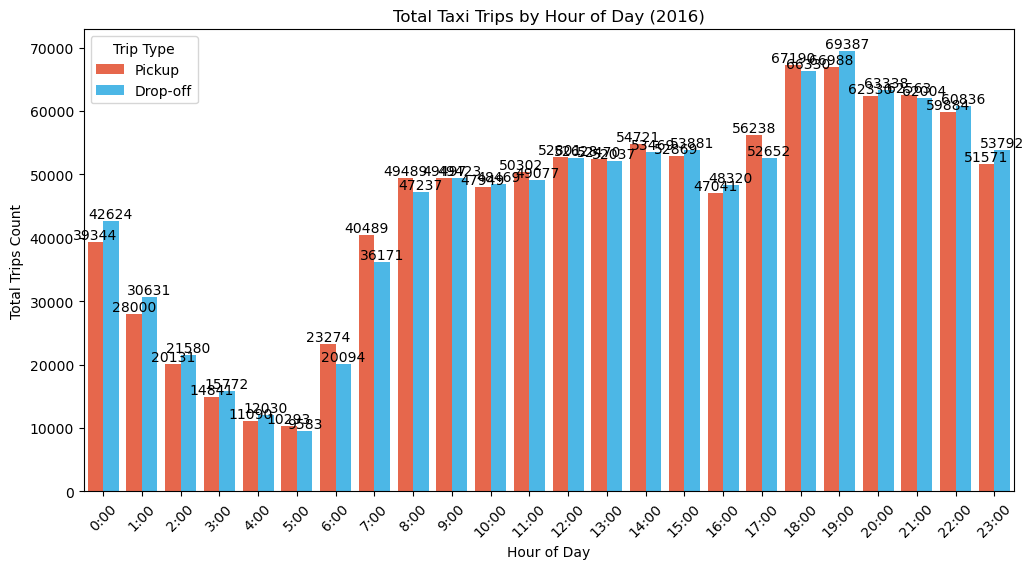

In [17]:
plot_trip_counts_by_hour(df)

In [18]:
pickup_count = df.groupby(df['pickup_datetime_hour'])['id'].count().reset_index()
pickup_count.rename(columns={'id': 'pickup_count', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_count = df.groupby(df['dropoff_datetime_hour'])['id'].count().reset_index()
dropoff_count.rename(columns={'id': 'dropoff_count', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_counts = pd.concat([pickup_count.set_index('hour'), dropoff_count.set_index('hour')], axis=1).reset_index()
hourly_counts

,hour,pickup_count,dropoff_count
0,0,39344,42624
1,1,28000,30631
2,2,20131,21580
3,3,14841,15772
4,4,11090,12030
5,5,10293,9583
6,6,23274,20094
7,7,40489,36171
8,8,49489,47237
9,9,49497,49423


**10. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) during different parts of the day in 2016?**

**Analysis**
- The highest number of taxi trips were ordered (pickup) during the morning hours between 06:00 and 12:00, totaling 261,000 pickups, with 250,471 drop-offs. This shows a peak in demand during morning commuting hours, likely due to people heading to work or appointments.
- The lowest number of taxi trips were ordered (pickup) during the early morning hours between 00:00 and 06:00, with 123,699 pickups and 132,220 drop-offs. The higher number of drop-offs suggests that many trips started before midnight or that early morning trips are more for getting passengers home after late-night activities.
- The afternoon hours (12:00 to 16:00) show a slight drop in demand compared to the morning, with 212,861 pickups and 212,015 drop-offs. Demand during this period is stable but less intense than in other parts of the day.
- The evening (16:00 to 20:00) and night (20:00 to 24:00) hours have almost equal taxi activity. Evening pickups totaled 237,457 with 236,689 drop-offs, while night pickups totaled 236,348 with 239,970 drop-offs. This consistency across evening and night suggests sustained demand after work and into the later hours, possibly for social or leisure activities.

**Recommendation**
- Increase taxi availability during the morning hours (06:00 - 12:00) to accommodate the highest demand. Ensuring more drivers are available during this time will help reduce wait times and improve service.
- Maintain steady availability of taxis throughout the evening (16:00 - 20:00) and night (20:00 - 24:00), as demand remains consistently high. Focus on key areas such as business districts and entertainment zones to meet the steady demand for both pickups and drop-offs.
- Reduce fleet deployment during the early morning hours (00:00 - 06:00) as demand is significantly lower, but maintain a presence to cover essential trips, such as late-night returns or airport runs.
- Optimize driver shifts in the afternoon (12:00 - 16:00) when demand is stable but not as high. Implement flexible scheduling to ensure a balanced fleet throughout the day while preparing for peak periods in the evening and night.

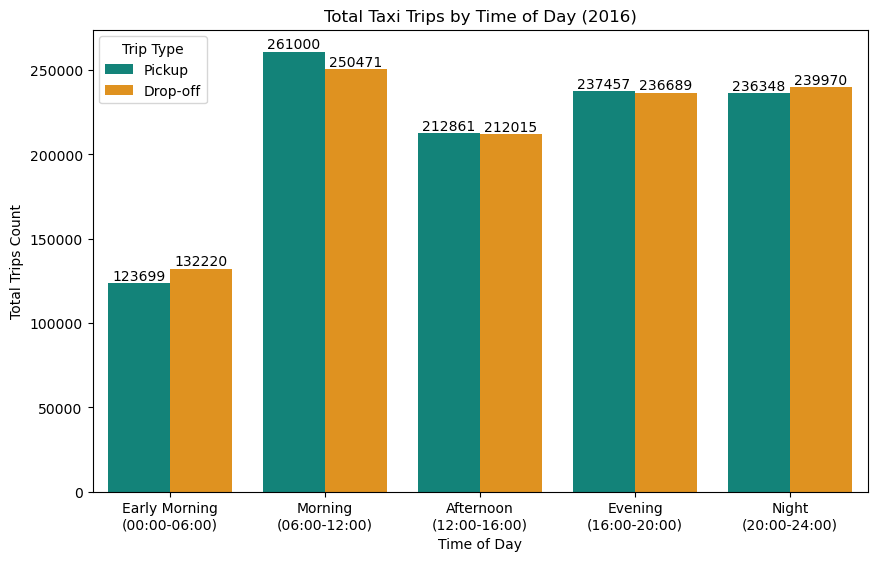

In [19]:
plot_taxi_trips_by_time_of_day(df)

**11. How many taxi trips were there on weekdays in 2016?**

**Analysis**
- The demand for taxi trips gradually increases from Monday (137,415 trips) to Friday (164,930 trips), indicating that the demand builds up throughout the workweek, reaching its peak on Friday. This suggests that as the week progresses, people engage in more activities that require transportation, such as business meetings, social events, or weekend preparation.
- After Friday's peak, the number of trips slightly decreases on Saturday (161,732 trips), though demand remains high over the weekend.
- A more significant decrease is observed on Sunday (142,216 trips), as the weekend comes to an end and people likely prepare for the upcoming workweek.
- The cycle restarts on Monday, with the lowest demand of the week, and the pattern repeats itself.

**Recommendation**

- Monitor the trend of increasing demand from Monday to Friday and ensure that the number of available taxis scales up gradually throughout the week. This can be achieved by scheduling additional drivers or adjusting vehicle dispatch based on demand forecasts.
- The decrease in demand after Friday suggests that while taxi services are still needed on the weekend, there is slightly less pressure compared to Friday. Use this insight to balance taxi availability accordingly: maintain high availability on Saturdays, but slightly reduce the fleet for Sunday, as demand drops significantly before the new workweek begins.

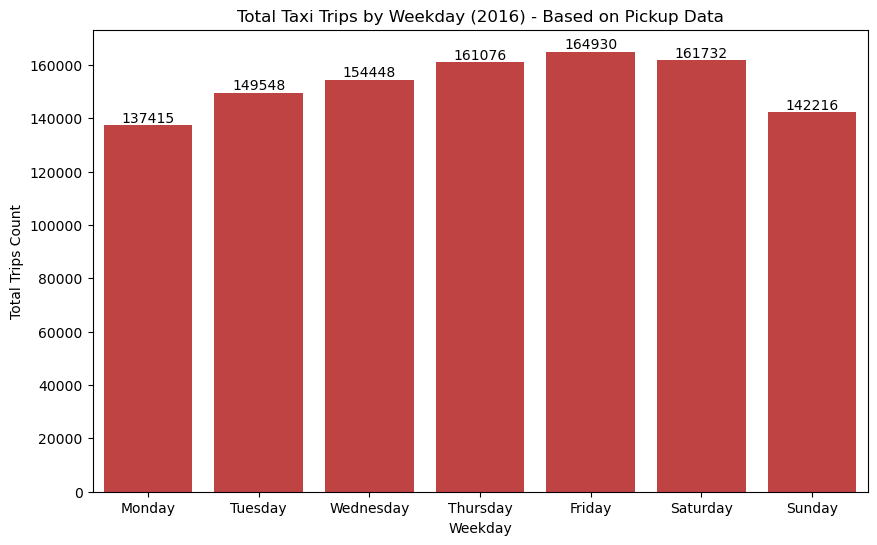

In [20]:
plot_pickup_by_weekday(df)

**12. How many taxi trips were there each month in 2016?**

**Analysis**
- The highest number of taxi trips occurred in March (188,627 trips), followed by April (184,983 trips). The lowest number of trips happened in January (168,632 trips).
- There is a steady increase in the number of taxi trips from January to March, followed by a gradual decline from April to June.
- From the dataframe, there are 0 pickups in July, which means no new rides started in July based on the dataset.
- From the dataframe, there are 93 dropoffs in July, meaning that these rides began in late June and ended in July.

**Recommendation**
- Since there is a clear increase in demand from January to March, implementing targeted marketing campaigns in the early months of the year can help capture more customers and boost revenue.
- Given the fluctuation in taxi trip demand, consider implementing dynamic pricing to maximize profits during peak months like March. This can help capitalize on increased demand and manage supply more efficiently.
- Conduct further analysis to understand why demand peaks in March and decreases afterward. Understanding the drivers behind these trends (e.g., weather, events, or holidays) will help in predicting future demand and developing proactive strategies.

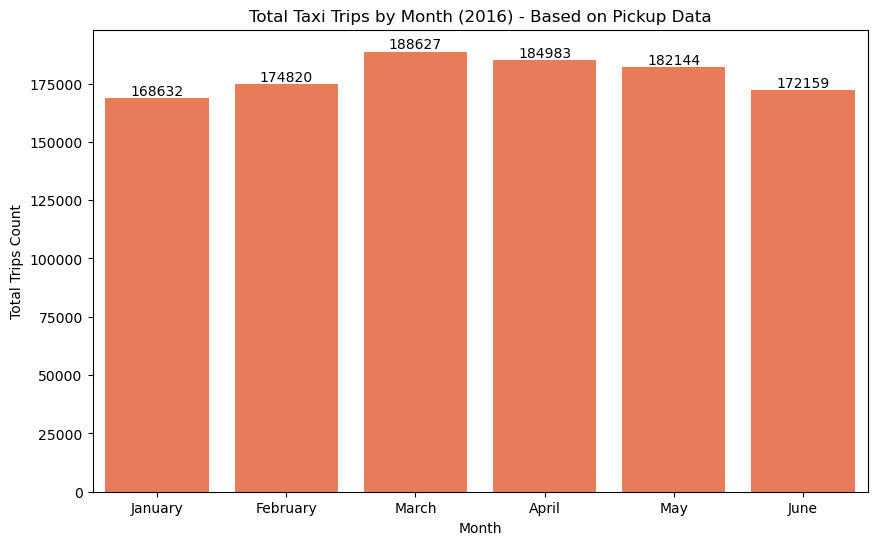

In [21]:
plot_pickup_by_month(df)

In [22]:
pickup_july = df[df["pickup_datetime_month"]==7]["pickup_datetime_month"].count()
print(pickup_july)

0


In [23]:
dropoff_july = df[df["dropoff_datetime_month"]==7]["dropoff_datetime_month"].count()
print(dropoff_july)

93


**13. What was the average distance covered by taxis for trips that were either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?**

**Analysis**
- The longest average distances for both pickup (8.36 km) and drop-off (7.97 km) occur at 05:00. The second-highest average trip distance happens at 04:00, with 7.25 km for pickups and 6.84 km for drop-offs.
- The shortest distances are observed between 10:00 and 17:00, where the average distance for pickups and drop-offs hovers around 4-5 km. For instance, at 09:00, the average pickup distance is 4.19 km, and the drop-off distance is 4.33 km.
- Early morning hours between 00:00 and 06:00 exhibit relatively long trips, especially between 03:00 and 06:00, where the average distance stays between 5.84 km and 8.36 km.
- Nighttime trips from 20:00 to 23:00 have stable distances, ranging between 4.85 km and 5.61 km for both pickup and drop-off, showing consistent demand during these hours.

**Recommendation**
- The highest average trip distances occur during early morning trips (04:00 - 06:00), indicating a surge in longer-distance travel. The company could optimize fleet allocation and driver availability during these hours to maximize service efficiency and revenue. Marketing campaigns could target customers who frequently book long-distance rides during this period, potentially promoting special fares for extended trips.
- Between 10:00 and 17:00, there is a lower average trip distance, indicating shorter trips. The company can explore ways to increase trip frequency or optimize pricing for short-distance travel to boost profitability. Offering promotions for quick rides or bundling services during these hours could attract more customers for shorter trips.

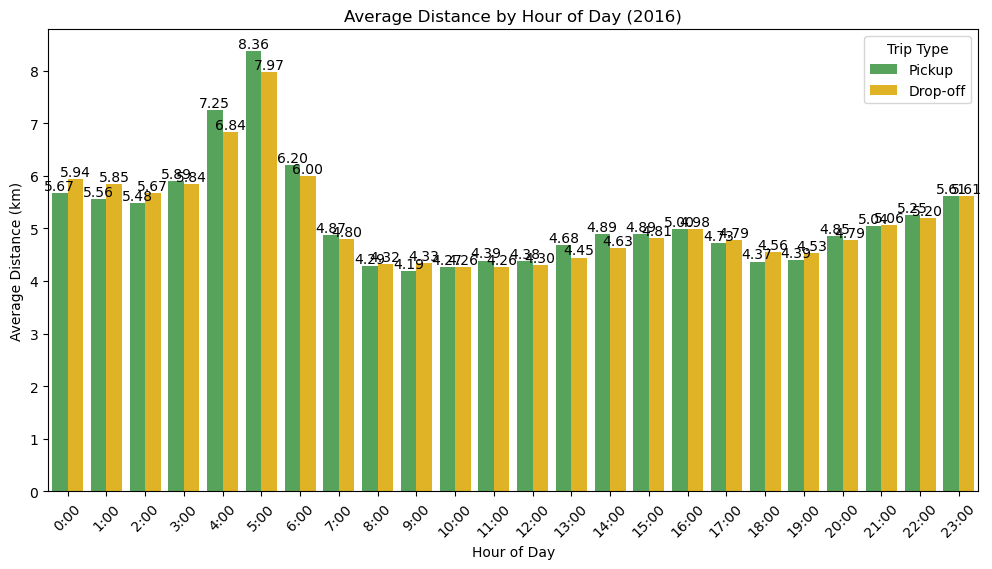

In [24]:
plot_average_distance_covered_by_hour(df)

In [25]:
pickup_distances = df.groupby('pickup_datetime_hour')['distance_osrm'].mean().reset_index()
pickup_distances.rename(columns={'distance_osrm': 'pickup distance', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_distances = df.groupby('dropoff_datetime_hour')['distance_osrm'].mean().reset_index()
dropoff_distances.rename(columns={'distance_osrm': 'dropoff distance', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_distances = pd.concat([pickup_distances.set_index('hour'), dropoff_distances.set_index('hour')], axis=1).reset_index().round(2)
hourly_distances

,hour,pickup distance,dropoff distance
0,0,5.67,5.94
1,1,5.56,5.85
2,2,5.48,5.67
3,3,5.89,5.84
4,4,7.25,6.84
5,5,8.36,7.97
6,6,6.20,6.00
7,7,4.87,4.80
8,8,4.29,4.32
9,9,4.19,4.33


**14. What was the average speed of taxis within a 24-hour period in 2016?**

**Analysis**
- Speeds are higher in the early morning hours (00:00 - 06:00), especially between 04:00 and 06:00. The highest average speed for both pickup and drop-off trips occurs at 05:00, with a speed of 33.52 km/h for pickups and 33.21 km/h for drop-offs.
- Between 00:00 and 03:00, the speeds remain relatively high, ranging from 23.40 km/h to 26.57 km/h, indicating low traffic during these hours.
- Speeds begin to decline sharply starting from 07:00, where a notable decrease to around 20.66 km/h for pickups and 22.01 km/h for drop-offs occurs.
- By 09:00, the speeds drop further to 16.61 km/h for pickups and 16.64 km/h for drop-offs, showing the impact of morning rush hour traffic.
- The taxi speeds remain relatively low between 09:00 and 18:00, fluctuating between 15.98 km/h and 16.78 km/h. This suggests moderate traffic conditions during this period. The speeds stay stable, with minor differences between pickup and drop-off speeds.
- There is a noticeable increase in speed starting from 19:00, where the average speed rises from 17.91 km/h to 22.33 km/h by 23:00. The improvement in speeds toward the end of the day indicates less congestion during nighttime hours.

**Recommendation**
- Based on the speed trends, taxi services should increase the number of available drivers during low-speed periods, particularly between 08:00 and 19:00. These hours experience lower average speeds, indicating traffic congestion and potentially higher demand for taxis.
- The data suggest that traffic congestion is a significant factor affecting taxi trip durations, particularly between 08:00 and 19:00. Collaborating with local traffic authorities to identify congestion hotspots and optimize routes could help improve taxi trip durations.

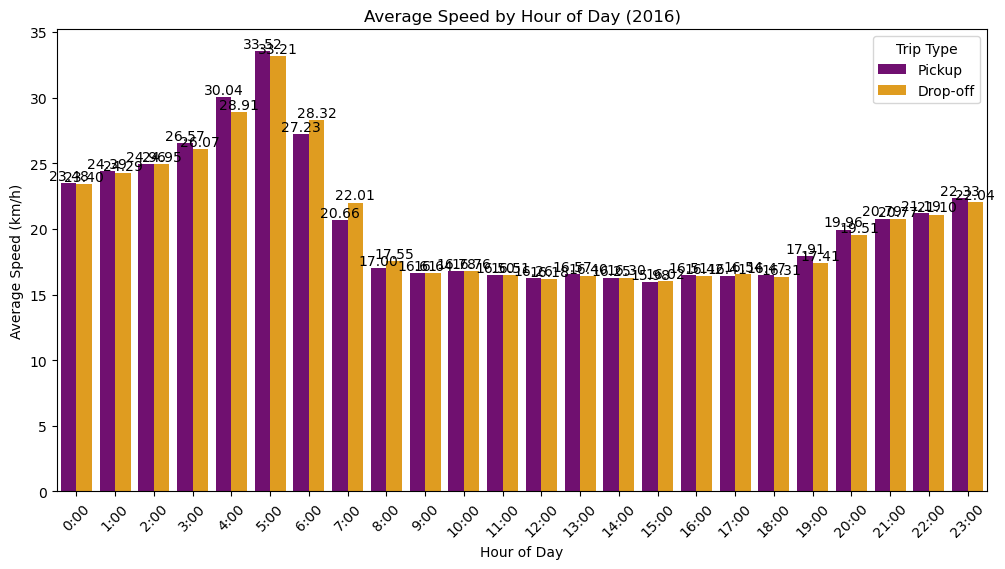

In [26]:
plot_average_speed_by_hour(df)

In [27]:
pickup_speeds = df.groupby('pickup_datetime_hour')['speed_osrm'].mean().reset_index()
pickup_speeds.rename(columns={'speed_osrm': 'pickup speed', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_speeds = df.groupby('dropoff_datetime_hour')['speed_osrm'].mean().reset_index()
dropoff_speeds.rename(columns={'speed_osrm': 'dropoff speed', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_speeds = pd.concat([pickup_speeds.set_index('hour'), dropoff_speeds.set_index('hour')], axis=1).reset_index().round(2)
hourly_speeds

,hour,pickup speed,dropoff speed
0,0,23.48,23.40
1,1,24.39,24.29
2,2,24.96,24.95
3,3,26.57,26.07
4,4,30.04,28.91
5,5,33.52,33.21
6,6,27.23,28.32
7,7,20.66,22.01
8,8,17.00,17.55
9,9,16.61,16.64


**15. Was the number of passengers related to trip duration?**

**Analysis**
- The majority of the trips are for a single passenger (757,265 trips), with a significant drop for two-passenger trips (155,997 trips), and further decreases for trips with more passengers. The fewest trips occur with six passengers (35,368 trips) and zero passengers (10 trips).
- There doesn't appear to be a strong direct correlation between the number of passengers and the trip duration. The range of trip durations seems relatively similar across different passenger counts. The duration varies significantly within each passenger count category. For example, for one-passenger trips, trip durations range from a few seconds up to over 20,000 seconds. This trend is mirrored in other passenger counts. There is no clear pattern suggesting that an increase in the number of passengers results in longer or shorter trip durations.
-  Outliers are present across all passenger counts, with some trips having unusually long durations (above 10,000 seconds). This could suggest external factors (such as traffic, trip distance, or other non-passenger-related factors) that may have more influence on trip duration.
- The data includes 10 trips with zero passengers, which is highly unusual and could indicate data quality issues (e.g., incorrect recording, cancellation after pickup, test or maintenance trips, or technical glitches). These trips should be investigated further.
- Trips with 3-6 passengers still show a wide range of trip durations, despite being a relatively smaller portion of the total trips.

**Recommendation**
- While the number of passengers doesn't seem to significantly influence trip duration, other factors like time of day, weather, or traffic congestion might have a stronger relationship with trip duration. These variables should be included in the next phase of analysis to identify any key drivers behind trip duration.
- If multi-passenger trips are less frequent, the company might consider optimizing resource allocation for one-passenger and two-passenger trips, which dominate the dataset. This could include dynamic pricing models, fleet management strategies, or promotions targeted towards solo riders.

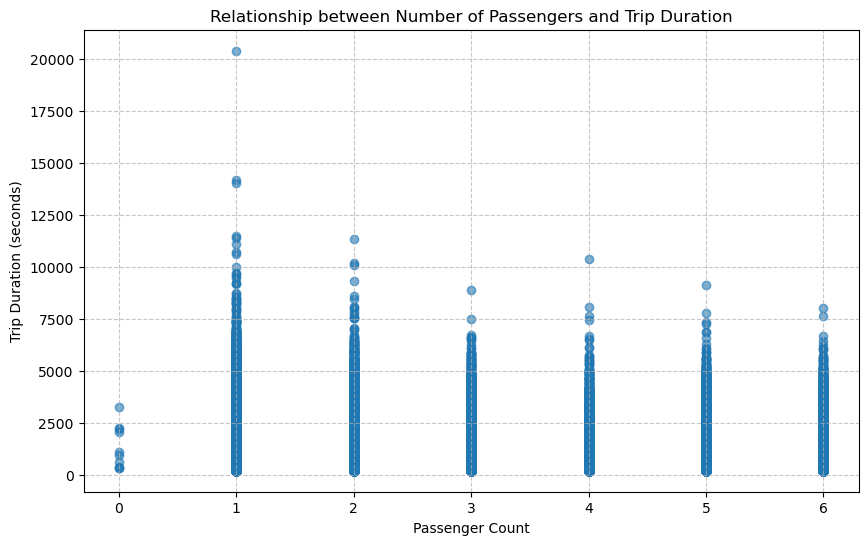

In [28]:
plot_passenger_trip_duration(df)

In [29]:
df["passenger_count"].value_counts()

1    757265
2    155997
5     57352
3     44376
6     35368
4     20997
0        10
Name: passenger_count, dtype: int64

**16. Did the number of passengers relate to the available vendors?**

**Analysis**
- The majority of trips (both for Vendor 1 and Vendor 2) are for a single passenger. Vendor 1 handles slightly more trips than Vendor 2, with around 402,826 trips compared to 354,439 trips for Vendor 2. This dominance suggests that individual travel is the most common use case, which is typical in urban taxi services.
- There is a noticeable drop in trip counts for both vendors when there are two passengers, but Vendor 2 surpasses Vendor 1 in this segment. Vendor 2 has 86,803 trips, while Vendor 1 has 69,194 trips. This might indicate that Vendor 2 may have better offers or services catering to small groups of passengers.
- The trip count for three and four passengers continues to decrease significantly, with Vendor 2 still having a slightly larger share than Vendor 1. These low numbers suggest that larger groups seldom use taxis for commuting or that taxis have limited seating capacity.
- For 5 passengers, Vendor 2 dominates this category, with 57,100 trips, while Vendor 1 has a mere 252 trips. For 6 passengers, Vendor 2 again significantly leads, with 35,249 trips versus 119 trips for Vendor 1. This wide disparity suggests that Vendor 2 may offer larger-capacity vehicles, such as vans or SUVs, more frequently than Vendor 1.

**Recommendation**
- Vendor 1 should consider expanding its fleet to include more vehicles that can accommodate larger groups, especially vans or SUVs. This will allow them to better compete with Vendor 2 in the 5-6 passenger segments, where they are severely underperforming.
- Vendor 2 should continue to capitalize on its advantage in serving larger groups but may want to optimize its services for solo passengers, where it currently lags behind Vendor 1.

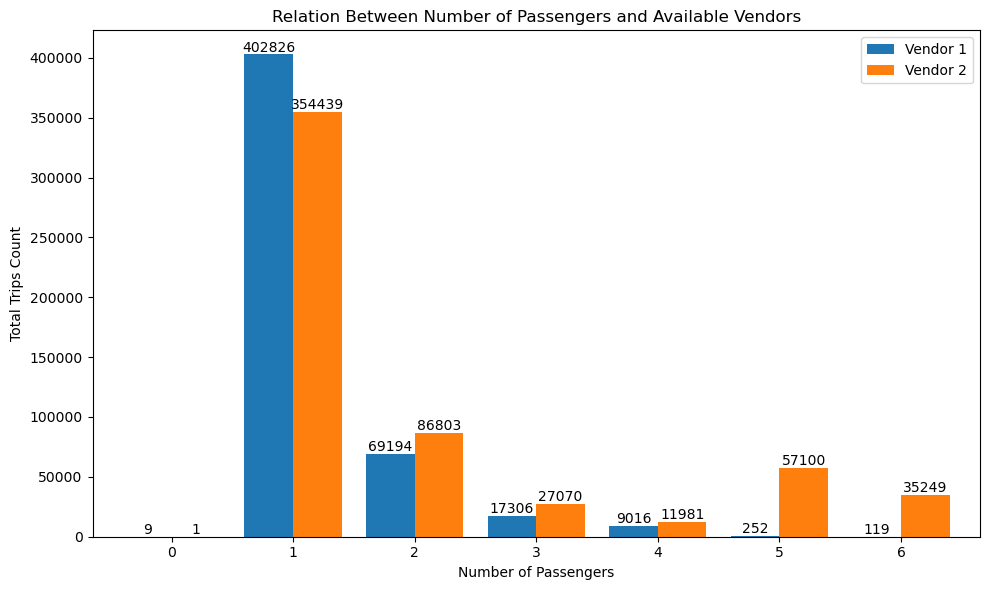

In [30]:
plot_passenger_vendor(df)

**17. What was the operational area for taxi trips in 2016?**

**A. City-Level Analysis**

**New York City (NYC):**
- **Pickup Points**:
    - High concentrations around central Manhattan, particularly in areas like Midtown and Financial District.
    - Brooklyn displays moderate pickup activity, particularly in Downtown Brooklyn and Williamsburg.
    - Queens shows minimal pickup activity outside airport regions such as JFK and LaGuardia.
    
- **Dropoff Points**:
    - Similar concentration in central Manhattan, with Midtown and Financial District as key dropoff hubs.
    - Brooklyn shows stronger dropoff activity than pickup, especially in Brooklyn Heights.
    - Queens features a noticeable increase in dropoff activity around airports (JFK, LaGuardia) and central hubs.

**New Jersey:**
- **Pickup Points**:
    - Strong activity in areas surrounding Jersey City and Newark, with notable commuter traffic into NYC.
    - Some suburban areas show minimal pickup activity.

- **Dropoff Points**:
    - Dropoff activity is concentrated in the same commuter regions of Jersey City, Newark, and some parts of Union City.

**Long Island:**
- **Pickup Points**:
    - Pickup activity concentrated near NYC-adjacent areas, including Hempstead and Massapequa.
    - Sparse activity in more distant Long Island regions.

- **Dropoff Points**:
    - Similar concentration around closer NYC suburbs, especially in Hempstead.
    - Sparse activity in far eastern Long Island.

**B. District-Level Analysis**

**Manhattan:**
- **Pickup Points**: 
    - Highest density in Midtown and Financial District.
- **Dropoff Points**: 
    - Similar pattern, with frequent dropoff points extending into Times Square and surrounding neighborhoods.

**Brooklyn:**
- **Pickup Points**: 
    - Concentration in Downtown Brooklyn, Williamsburg, and Brooklyn Heights.
- **Dropoff Points**: 
    - Strong dropoff points mirror pickup, especially in Brooklyn Heights.

**Queens:**
- **Pickup Points**: 
    - Minimal, focused on airports like JFK and LaGuardia.
- **Dropoff Points**: 
    - Increased dropoff activity around airport regions, particularly JFK and LaGuardia.

**C. Inter-City and Airport Connections**

- **Airport Pickup and Dropoff**:
    - Both JFK and LaGuardia continue to be key hubs for taxi pickups and dropoffs.
    - Newark Liberty Airport shows consistent pickup and dropoff activity for New Jersey travelers.

- **NYC-New Jersey Commuter Flow**:
    - A strong commuter flow is evident between Newark, Jersey City, and Manhattan, with notable pickup and dropoff concentration in these regions.

**D. Suburban Analysis (Long Island, NJ, and Westchester)**

**Long Island:**
- **Pickup and Dropoff Points**:
    - Strong concentration around NYC suburbs like Hempstead and Massapequa, with sparse activity in distant areas.

**New Jersey:**
- **Pickup and Dropoff Points**:
    - High activity near NYC, especially in areas like Newark and Jersey City.
    - Minimal activity in further suburban areas.

**Westchester:**
- **Pickup and Dropoff Points**:
    - Moderate activity, particularly in White Plains and Yonkers.

**E. Heat Map Analysis**

- **Core Activity**:
    - High density in Manhattan, with elevated activity extending into Brooklyn, Jersey City, and Newark.
  
- **Peripheral Activity**:
    - Reduced activity in suburban and outlying regions like Long Island, the outskirts of New Jersey, and Westchester County.

**Recommendation**

- Optimize Operations in High-Demand Areas:
    - Focus on enhancing fleet availability in Manhattan (especially Midtown and Financial District).
    - Improve real-time dispatching to minimize wait times during peak hours.

- Strengthen Airport Connectivity:
    - Enhance coordination between JFK, LaGuardia, and Newark airports, with dedicated services for pickups and dropoffs.
    - Collaborate with airlines to offer integrated passenger services.

- Expand Suburban Fleet:
    - Increase operations in suburban areas like Long Island and Westchester with flexible service models.
    - Consider special pricing structures for long-distance rides.

- Improve Cross-State Commuter Services:
    - Enhance NJ fleet coordination to handle high commuter traffic.
    - Prioritize transit hubs for improved accessibility and frequent traveler benefits.

**New York City Map**

![New York City Map](img/nyc_map.png)

**Pickup point (heatmap + markers)**

![Pickup Heatmap Marker](img/pickup_heatmap_marker.png)

**Dropoff point (heatmap + markers)**

![Dropoff Heatmap Marker](img/dropoff_heatmap_marker.png)

**Pickup point (markers)**

![Pickup Marker](img/pickup_marker.png)

**Dropoff point (markers)**

![Dropoff Marker](img/dropoff_marker.png)

In [31]:
# df_map_test = df.copy()

In [32]:
# df_map_test = df_map_test.head(1000)

In [33]:
# pickup_heatmap = create_heatmap(df_map_test, 'pickup_point', 'pickup_heatmap')
# dropoff_heatmap = create_heatmap(df_map_test, 'dropoff_point', 'dropoff_heatmap')

In [34]:
# %%time
# # running time = 30-60 mins
# pickup_heatmap = create_heatmap(df, 'pickup_latitude', 'pickup_longitude', 'pickup_heatmap')

In [35]:
# %%time
# # running time = 30-60 mins
# dropoff_heatmap = create_heatmap(df, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_heatmap')

**18. Which areas allowed taxis to send data in real-time?**

**A. City Level Analysis:**
- **New York City**: The heatmap indicates that areas with data stored and forwarded (as opposed to real-time transmission) are primarily concentrated in parts of Midtown Manhattan and Brooklyn. These areas may experience higher delays in real-time data transmission due to network constraints.

**B. Sub-District Level Analysis:**
- **Manhattan**: The Midtown area shows the highest concentration of stored and forwarded data, likely due to high network demand and congestion. Additionally, areas in the northern part of the island (e.g., Harlem) show moderate data transmission delays.
- **Brooklyn**: Areas around Williamsburg and Downtown Brooklyn exhibit significant instances of stored and forwarded data, indicating possible issues with real-time transmission.
- **Queens**: Areas around Flushing and Long Island City are showing lower, yet noticeable, amounts of stored data, suggesting potential network strain in certain areas.
- **Staten Island**: The southern portion of the island, especially near Richmond, has a small concentration of delayed data transmission, indicating minor network issues.
- **Bronx**: The heatmap indicates fewer instances of stored and forwarded data, meaning real-time transmission issues appear less significant compared to other boroughs.

**C. Specific Areas of Concern:**
- High-density zones on the heatmap represent areas where data transmission delays are concentrated, particularly in Midtown Manhattan and Williamsburg, Brooklyn.
- The markers suggest that these areas may include commercial hubs or busy residential zones with higher network congestion, leading to increased instances of non-real-time data transmission.

**Recommendation**

- **Targeted Infrastructure Improvement in High-Density Areas**:
  - Prioritize network upgrades in Midtown Manhattan and Brooklyn to reduce instances of data storage and forwarding. Upgrading network capacity in these areas will facilitate real-time data transmission.
  
- **Pilot Connectivity Solutions in Critical Locations**:
  - Introduce pilot projects aimed at expanding network bandwidth and increasing transmission efficiency, particularly in Williamsburg and Downtown Brooklyn. Evaluate these solutions and scale them across other boroughs if successful.

- **Engage with Network Providers**:
  - Collaborate with ISPs and telecom providers to address network congestion in identified hotspots. Partnering with these entities can lead to faster network improvements and ensure that real-time data capabilities are more widespread, especially in critical zones like Midtown Manhattan and Brooklyn.


![Send Data Heatmap](img/snd_heatmap.png)

![Send Data Heatmap](img/snd_marker.png)

In [36]:
# send_data_real_time = df[df['store_and_fwd_flag'] == 'Y']

In [37]:
# combined_coordinates = pd.concat([
#     send_data_real_time[['pickup_latitude', 'pickup_longitude']],
#     send_data_real_time[['dropoff_latitude', 'dropoff_longitude']].rename(columns={
#         'dropoff_latitude': 'pickup_latitude', 
#         'dropoff_longitude': 'pickup_longitude'
#     })
# ])

In [38]:
# combined_coordinates.info()

In [39]:
# %%time
# # running time = 1 mins
# send_data_real_time_area = create_heatmap(combined_coordinates, 'pickup_latitude', 'pickup_longitude', 
#                                           'send_data_real_time_heatmap')

**19. Did the ability to send data in real-time affect taxi trip duration?**

**Analysis**

- Distribution of Taxi Trips by Store and Forward Flag (Bar Chart):
    - The first bar chart shows that the vast majority of trips (99.4%) have the `store_and_fwd_flag` set to "N", indicating that these trips were transmitted in real-time. A very small portion (0.6%) of the trips were flagged as "Y", meaning the data was stored and forwarded later. This suggests that almost all taxis are capable of sending data in real-time, which is beneficial for monitoring operational efficiency.
  
- Effect of Store-and-Forward Flag on Taxi Trip Duration (Box Plot):
    - The second box plot shows that the trip duration distribution differs between the two groups. For trips transmitted in real-time (`store_and_fwd_flag = N`), the duration varies significantly, with some extreme outliers where trip times extend beyond 20,000 seconds (around 5.5 hours). These outliers likely indicate unusual trips, possibly caused by traffic, system glitches, or very long-distance trips.
    - Conversely, for trips where data was stored and forwarded later (`store_and_fwd_flag = Y`), the trip durations are generally shorter and more consistent, with fewer extreme outliers. This might suggest that when data is not transmitted in real-time, taxis are either limited to shorter trips or might operate in areas where real-time data transmission is less feasible.
- Conclusion:
    - The presence of extreme outliers in the real-time data group (`store_and_fwd_flag = N`) indicates that real-time data transmission may reflect a more accurate representation of trip conditions, including traffic, system errors, or long-distance trips.
    - The smaller and more consistent trip durations observed in the stored-and-forwarded group (`store_and_fwd_flag = Y`) could indicate that such trips are generally shorter or limited by factors affecting data transmission.

**Recommendations**

- Further Investigation into Long Trips:
    - The company should investigate the causes of the unusually long trips in the real-time data group. These could be legitimate long-distance trips, but may also reflect inefficiencies such as unreported stops or system errors. Identifying these outliers can provide insights into improving operational efficiency.
  
- Enhance Real-Time Data Transmission:
    - Given the small percentage of trips where data is not transmitted in real-time, it is recommended to upgrade or enhance infrastructure to support real-time data transmission across all trips. This would improve data reliability and operational monitoring.

- Operational Adjustments Based on Trip Duration Patterns:
    - The company might consider identifying any specific conditions (e.g., location, time of day) where trips are flagged as `store_and_fwd_flag = Y`. If these trips are generally shorter, optimizing resources for these situations may improve efficiency.


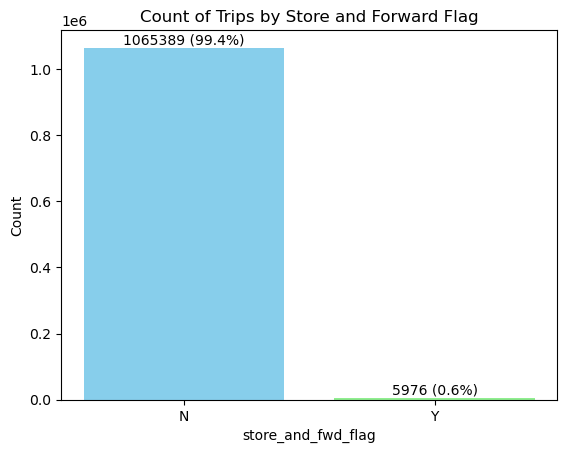

In [40]:
plot_store_and_fwd_trip_counts(df)

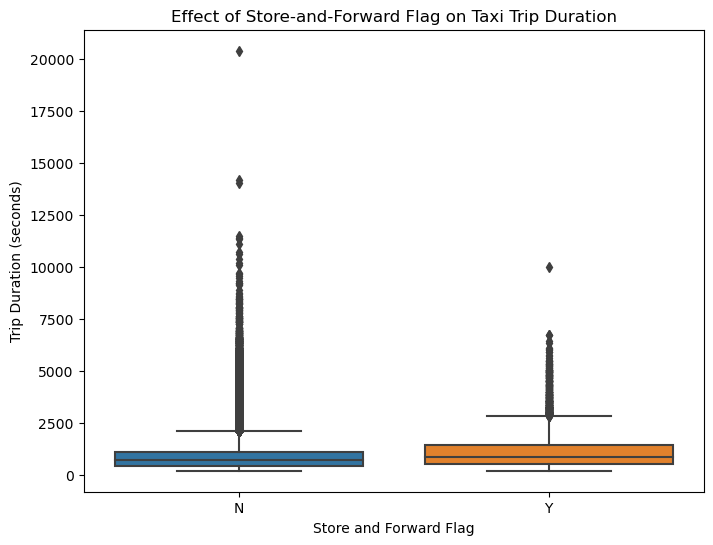

In [41]:
plot_store_and_fwd_trip_duration(df)

**20. Did the ability to send data in real-time depend on how far or close the distance was?**

**Analysis**
- The median trip distance for both 'N' and 'Y' categories is similar, although the 'Y' group has a slightly higher median. This indicates that on average, trips where data is stored and forwarded tend to cover slightly longer distances.
- The IQR (Interquartile Range), which represents the middle 50% of the data, is wider for trips with the 'Y' flag compared to those with 'N'. This suggests more variability in trip distances when the data is stored and forwarded rather than transmitted in real-time.
- Both categories exhibit outliers, with the 'N' group having a significant number of extreme outliers, indicating some very long-distance trips. The 'Y' group also has outliers, but fewer compared to the 'N' group.
- The maximum trip distance for both categories appears to be comparable. However, the presence of more extreme outliers in the 'N' group may suggest that some trips are recorded as longer in real-time transmission.
- While the store-and-forward mechanism ('Y') may be associated with slightly longer trips, the real-time transmission ('N') group exhibits more variability in trip distance. This could imply that the ability to transmit data in real-time is either used for a broader variety of trips or more likely to capture longer, abnormal trips.

**Recommendation**
- Real-time data transmission ('N') appears to capture a wider range of trip distances, including many outliers. This may be an opportunity to enhance monitoring of long trips in real-time, providing better insights into trip patterns and potentially identifying anomalies such as inefficient routes or fraudulent activity.
- The presence of significant outliers in both groups, especially the 'N' group, indicates the need for an outlier detection system. Identifying trips with unusually long distances can help in operational cost-saving, route optimization, and detection of abnormal behaviors (e.g., driver detours or technical data issues).

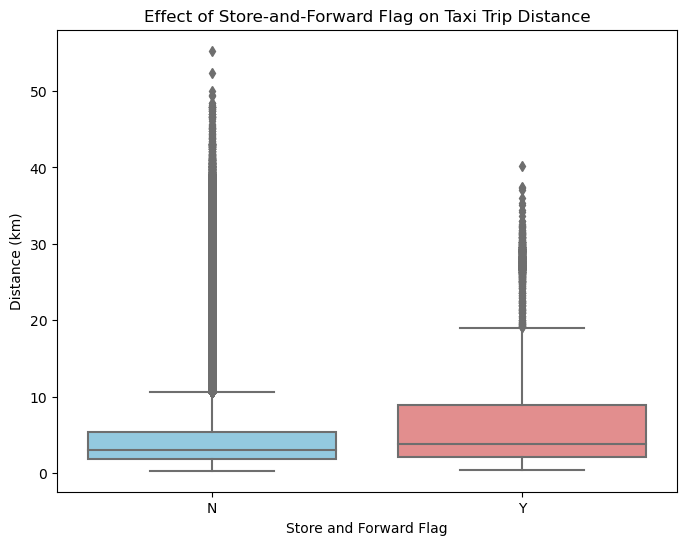

In [42]:
plot_store_and_fwd_trip_distance(df)

---

In [43]:
df.to_csv('train_temp3.csv', index=False) # index=False to avoid saving the index as a column
test.to_csv('test_temp3.csv', index=False)

In [44]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

In [2]:
df = pd.read_csv('train_temp3.csv')
test = pd.read_csv('test_temp3.csv')

In [3]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period,trip_duration
0,id0458976,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,6,18,Wednesday,Evening,1133
1,id0434613,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,4,13,Monday,Afternoon,887
2,id3809234,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,5,12,Saturday,Afternoon,686
3,id1203705,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,5,18,Saturday,Evening,818
4,id1896645,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,4,23,Sunday,Night,951


In [4]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

train shape: (1071365, 19)
test shape: (291729, 19)


<div id="unncols">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">3.2 Drop Unnecessary Columns</div>
</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071365 entries, 0 to 1071364
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1071365 non-null  object 
 1   vendor_id                 1071365 non-null  int64  
 2   passenger_count           1071365 non-null  int64  
 3   pickup_longitude          1071365 non-null  float64
 4   pickup_latitude           1071365 non-null  float64
 5   dropoff_longitude         1071365 non-null  float64
 6   dropoff_latitude          1071365 non-null  float64
 7   store_and_fwd_flag        1071365 non-null  object 
 8   distance_osrm             1071365 non-null  float64
 9   speed_osrm                1071365 non-null  float64
 10  pickup_datetime_month     1071365 non-null  int64  
 11  pickup_datetime_hour      1071365 non-null  int64  
 12  pickup_datetime_weekday   1071365 non-null  object 
 13  pickup_datetime_period    1

**Features to Drop:**
- `id`: This is just an identifier and doesn't provide any predictive value.
- `dropoff_datetime_month`, `dropoff_datetime_weekday`, `dropoff_datetime_hour`, `dropoff_datetime_period`: These are derived from the drop-off time, which we generally do not know in advance when making predictions. They should be dropped to avoid data leakage.

In [6]:
columns_to_drop = ['id', 'dropoff_datetime_month', 'dropoff_datetime_weekday', 
                   'dropoff_datetime_hour', 'dropoff_datetime_period']

In [7]:
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071365 entries, 0 to 1071364
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vendor_id                1071365 non-null  int64  
 1   passenger_count          1071365 non-null  int64  
 2   pickup_longitude         1071365 non-null  float64
 3   pickup_latitude          1071365 non-null  float64
 4   dropoff_longitude        1071365 non-null  float64
 5   dropoff_latitude         1071365 non-null  float64
 6   store_and_fwd_flag       1071365 non-null  object 
 7   distance_osrm            1071365 non-null  float64
 8   speed_osrm               1071365 non-null  float64
 9   pickup_datetime_month    1071365 non-null  int64  
 10  pickup_datetime_hour     1071365 non-null  int64  
 11  pickup_datetime_weekday  1071365 non-null  object 
 12  pickup_datetime_period   1071365 non-null  object 
 13  trip_duration            1071365 non-null 

<div id="kmeansclus">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">3.3 K-means Clustering</div>
</div>

I will transform the features `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, and `dropoff_latitude` into `pickup_cluster` and `dropoff_cluster` using the K-means clustering method. This transformation is necessary to reduce the complexity of the spatial data by grouping nearby locations into distinct clusters, which simplifies the relationship between location and trip duration. 

Clustering helps the model capture regional patterns and spatial dependencies in a more generalized way, reducing the noise from small variations in exact coordinates. Additionally, using clusters can improve the model’s ability to predict trip durations more accurately by focusing on larger geographic areas rather than individual points, ultimately enhancing computational efficiency and performance.

In [9]:
pickup_coords = df[['pickup_longitude', 'pickup_latitude']]
dropoff_coords = df[['dropoff_longitude', 'dropoff_latitude']]

The optimal number of clusters (k) is identified at the point where the inertia (sum of squared distances) starts to decrease more slowly, forming an "elbow" in the plot. In these plots, the elbow is noticeable around k = 3 or k = 4, indicating where the drop in inertia begins to level off. To ensure a more balanced model that captures sufficient complexity without overfitting, we will choose k = 4 for both cases as it provides a more stable clustering solution.

In progress... k = 1
In progress... k = 2
In progress... k = 3
In progress... k = 4
In progress... k = 5
In progress... k = 6
In progress... k = 7
In progress... k = 8
In progress... k = 9
In progress... k = 10


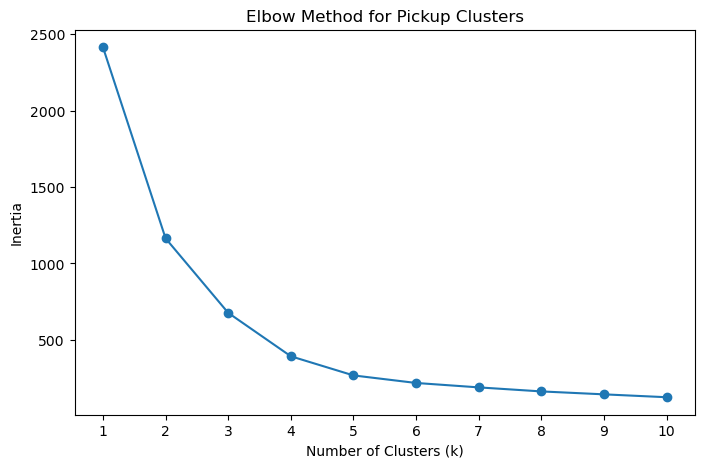

In [10]:
elbow_method(pickup_coords, title='Elbow Method for Pickup Clusters')

In progress... k = 1
In progress... k = 2
In progress... k = 3
In progress... k = 4
In progress... k = 5
In progress... k = 6
In progress... k = 7
In progress... k = 8
In progress... k = 9
In progress... k = 10


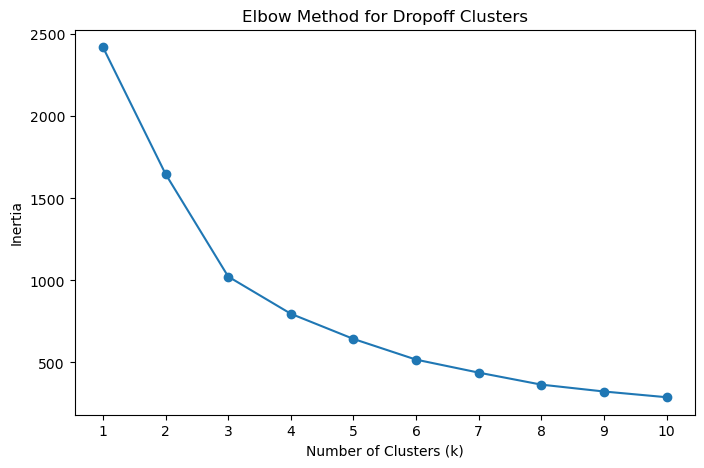

In [11]:
elbow_method(dropoff_coords, title='Elbow Method for Dropoff Clusters')

In [12]:
optimal_k_pickup = 4
optimal_k_dropoff = 4

In [13]:
kmeans_pickup = KMeans(n_clusters=optimal_k_pickup, random_state=rst, n_init=10)
df['pickup_cluster'] = kmeans_pickup.fit_predict(pickup_coords)

In [14]:
kmeans_dropoff = KMeans(n_clusters=optimal_k_dropoff, random_state=rst, n_init=10)
df['dropoff_cluster'] = kmeans_dropoff.fit_predict(dropoff_coords)

In [15]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,trip_duration,pickup_cluster,dropoff_cluster
0,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,1133,2,1
1,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,887,0,0
2,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,686,0,0
3,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,818,3,3
4,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,951,0,0


In [16]:
df.shape

(1071365, 16)

In [17]:
# # Pick n random samples
# sampled_df_pickup = sample_clusters(df, 'pickup_cluster', n=10000)
# sampled_df_dropoff = sample_clusters(df, 'dropoff_cluster', n=10000)

In [18]:
# sampled_df_pickup.shape, sampled_df_dropoff.shape

In [19]:
# %%time
# # running time = 1-2 min
# plot_cluster_map(sampled_df_pickup, cluster_type='pickup', output_file='pickup_clusters_map.html')

In [20]:
# %%time
# # running time = 1-2 min
# plot_cluster_map(sampled_df_dropoff, cluster_type='dropoff', output_file='dropoff_clusters_map.html')

In [21]:
# %%time
# # running time = 2-3 min
# plot_cluster(df, 'pickup')

In [22]:
# %%time
# # running time = 2-3 min
# plot_cluster(df, 'dropoff')

By analyzing these clusters, we will identify which cluster has the most significant features influencing taxi trip duration using feature selection techniques and machine learning models.

**New York City Map**

![NYC Map](img/nyc_map_small.png)

**Pickup Cluster (40,000 samples)**

![pickup cluster](img/pickup_cluster.png)

**Pickup Cluster (all data)**

![pickup plot](img/pickup_plot.png)

**Dropoff Cluster (40,000 samples)**

![dropoff cluster](img/dropoff_cluster.png)

**Dropoff Cluster (all data)**

![dropoff plot](img/dropoff_plot.png)

---

Now that we've created `pickup_cluster` and `dropoff_cluster` features using K-means, we can safely drop the original geographic coordinates (`pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, `dropoff_latitude`). The clusters capture the key spatial patterns by grouping similar locations into regions, making the precise coordinates unnecessary.

By dropping the original features, we reduce dimensionality, improve model efficiency, and prevent overfitting to specific locations. The clusters provide a higher-level, more interpretable representation of location data that is sufficient for machine learning models.

This simplifies the dataset without losing important geographic information.

In [23]:
cols_to_drop = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [24]:
df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071365 entries, 0 to 1071364
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vendor_id                1071365 non-null  int64  
 1   passenger_count          1071365 non-null  int64  
 2   store_and_fwd_flag       1071365 non-null  object 
 3   distance_osrm            1071365 non-null  float64
 4   speed_osrm               1071365 non-null  float64
 5   pickup_datetime_month    1071365 non-null  int64  
 6   pickup_datetime_hour     1071365 non-null  int64  
 7   pickup_datetime_weekday  1071365 non-null  object 
 8   pickup_datetime_period   1071365 non-null  object 
 9   trip_duration            1071365 non-null  int64  
 10  pickup_cluster           1071365 non-null  int32  
 11  dropoff_cluster          1071365 non-null  int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 89.9+ MB


---

In [26]:
df.to_csv('train_temp4.csv', index=False) # index=False to avoid saving the index as a column
test.to_csv('test_temp4.csv', index=False)

In [27]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

In [28]:
df = pd.read_csv('train_temp4.csv')
test = pd.read_csv('test_temp4.csv')

In [29]:
df.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,trip_duration,pickup_cluster,dropoff_cluster
0,2,1,N,5.6729,18.025102,6,18,Wednesday,Evening,1133,2,1
1,2,1,N,2.9567,12.000135,4,13,Monday,Afternoon,887,0,0
2,2,1,N,2.8334,14.869155,5,12,Saturday,Afternoon,686,0,0
3,1,1,N,2.3150,10.188264,5,18,Saturday,Evening,818,3,3
4,2,1,N,2.9457,11.150915,4,22,Sunday,Night,951,0,0


In [30]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

train shape: (1071365, 12)
test shape: (291729, 19)


<div id="feslecenginering">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">4. Feature Selection and Engineering</div>
</div>

<div id="corrmatrix">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">4.1 Correlation Matrix</div>
</div>

**Analysis**

- The highest correlation observed is between `passenger_count` and `vendor_id` (0.23), which is classified as weak. Other correlations, including `dropoff_cluster` and `pickup_cluster` (0.18) and `dropoff_cluster` with `trip_duration` (-0.13), are also weak. These weak correlations suggest that none of the features have a strong linear relationship with each other or with the target variable, `trip_duration`.
- The negative correlation between `dropoff_cluster` and `trip_duration` (-0.135) implies that as the drop-off location's cluster number increases, the trip duration may decrease slightly, suggesting potential geographical or traffic flow patterns.
- The correlations with time-related features (e.g., `pickup_datetime_hour`, `pickup_datetime_month`) and `trip_duration` are also weak, indicating that the time of day or month may not significantly influence trip duration in this dataset.
- The correlation between `passenger_count` and `trip_duration` is minimal (0.034), suggesting that the number of passengers does not significantly affect trip duration, which might be an unexpected finding in practical scenarios.
- The vendor ID shows weak correlation with `trip_duration` (0.020), which could imply that different taxi vendors do not have significantly different trip durations, perhaps due to standardized practices or similar operational constraints.

**Multicollinearity Considerations**
- The observed weak correlations among the features suggest a low risk of multicollinearity. For instance, `pickup_cluster`, `vendor_id`, and `passenger_count` show correlations close to zero or slight variations, which generally indicates that these features can be used together without significantly affecting the model's performance.
- The independence among the features is beneficial for model training, as it allows the machine learning algorithms to capture the individual effects of each feature on the target variable without confounding effects from highly correlated features.

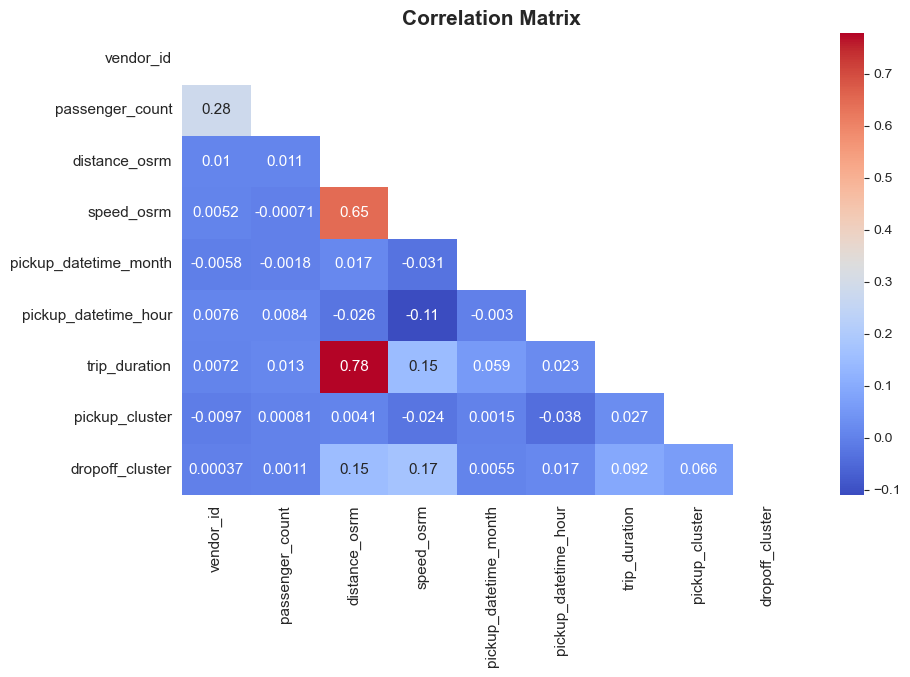

In [31]:
num_corr(df)

In [32]:
get_ranked_correlations(df)

,Variable 1,Variable 2,Correlation,Rank,Strength
24,trip_duration,distance_osrm,0.778060,1.0,Strong
21,speed_osrm,distance_osrm,0.648183,2.0,Moderate
1,passenger_count,vendor_id,0.284788,3.0,Weak
35,dropoff_cluster,speed_osrm,0.171524,4.0,Weak
26,dropoff_cluster,distance_osrm,0.152911,5.0,Weak
33,trip_duration,speed_osrm,0.146452,6.0,Weak
32,pickup_datetime_hour,speed_osrm,-0.110590,7.0,Weak
62,dropoff_cluster,trip_duration,0.092440,8.0,Weak
71,dropoff_cluster,pickup_cluster,0.066101,9.0,Weak
42,trip_duration,pickup_datetime_month,0.059486,10.0,Weak


---

In [ ]:
df.to_csv('train_temp5.csv', index=False) # index=False to avoid saving the index as a column
test.to_csv('test_temp5.csv', index=False)

In [ ]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

In [ ]:
df = pd.read_csv('train_temp5.csv')
test = pd.read_csv('test_temp5.csv')

In [ ]:
df.head()

In [ ]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

<div id="modselbuild">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">5. Model Selection and Building</div>
</div>

<div id="encodcatfeatures">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">5.1 Model Benchmarking</div>
</div>

<div id="encodcatfeatures">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">4.2 Encoding</div>
</div>

In [ ]:
df.info()

**Label Encoding**

In [ ]:
df["pickup_datetime_weekday"] = df["pickup_datetime_weekday"].map({"Monday":1,"Tuesday":2,"Wednesday":3, 
                                                                   "Thursday":4, "Friday":5, "Saturday":6, 
                                                                   "Sunday":7}).astype("int")

**Dummy Encoding**

In [ ]:
columns = ["vendor_id","store_and_fwd_flag", "pickup_datetime_period", "pickup_cluster", "dropoff_cluster"]

In [ ]:
df = pd.get_dummies(df, columns=columns, dtype=int, drop_first=True)

**Cyclical Encoding**

The pickup_datetime_period feature is created using bins that categorize distinct parts of the day (Early Morning, Morning, Afternoon, Evening, Night). Each of these categories is qualitative and represents a segment of time rather than a continuous cycle. For example, Early Morning does not directly transition into Night, nor does it imply a cyclical relationship.

The binning method I used creates distinct categories that do not wrap around. The periods are inherently separate. Therefore, applying cyclical encoding could mislead the model into interpreting a non-existent continuity among these categories.

In [ ]:
df['hour_sin'] = np.sin(2 * np.pi * df['pickup_datetime_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['pickup_datetime_hour'] / 24)

In [ ]:
df['weekday_sin'] = np.sin(2 * np.pi * df['pickup_datetime_weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['pickup_datetime_weekday'] / 7)

In [ ]:
df['month_sin'] = np.sin(2 * np.pi * df['pickup_datetime_month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['pickup_datetime_month'] / 12)

In [ ]:
df.drop(columns=['pickup_datetime_hour', 'pickup_datetime_weekday', 'pickup_datetime_month'], axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df.head()

<div id="skewtrans">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">3.4 Skewness Transformation</div>
</div>

In [ ]:
df.info()

In [ ]:
print(df.describe())

In [ ]:
df.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.show()

As shown by the skewness values, the passenger_count has a skewness of 2.1 and trip_duration has a skewness of 25.4. Both fall into the category of severe skewness (greater than 1 or less than -1), indicating that these variables should be transformed to reduce skewness and improve normality

In [ ]:
skewness = df.skew(numeric_only=True)
print(skewness)

Since we have severe skewness along with zero and positive values, we use the Log transformation and Box-Cox transformation to reduce the skewness.

In [ ]:
df_old = df.copy()

**Box-Cox Transformation**

In [ ]:
# Adding a small constant (+1) to handle zeros -> Remember this for interpretation
df['adjusted_passenger_count'] = df_old['passenger_count'] + 1

df['boxcox_passenger_count'], lambda_passenger = stats.boxcox(df['adjusted_passenger_count'])

**Log Transformation**

In [ ]:
df['log_trip_duration'] = np.log(df_old['trip_duration'])

In [ ]:
df.drop(['trip_duration','passenger_count','adjusted_passenger_count'], axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df.describe()[['boxcox_passenger_count', 'log_trip_duration']]

The histogram shows that the distribution is still concentrated around 1 (or close to zero after transformation), with a less prominent long tail compared to the original skewed distribution. The distribution appears much more compressed, which is expected after applying a transformation like Yeo-Johnson.

The Q-Q plot still shows some deviation from the normal distribution, especially at the tails (extreme values), but overall the data points are closer to the red line, which represents a normal distribution.
Small deviations at the tails are common and not necessarily problematic, especially in real-world datasets.

In [ ]:
qqplot(df_old, df, 'passenger_count', 'boxcox_passenger_count')

The transformed Histogram shows a bell-shaped, nearly normal distribution, meaning the data is now much more evenly spread out, with no extreme skew.

The transformed Q-Q plot still shows some slight deviation at the tails, but overall, the data points are much closer to the red line (normal distribution). This suggests that the majority of the data now follows a normal pattern, though the extremes at the high end may still have some impact.

In [ ]:
qqplot(df_old, df, 'trip_duration', 'log_trip_duration')

The skewness value now ranges between -0.5 and 0.5, which indicates the distribution is approximately symmetrical and close to a normal distribution (skewness = 0).

In [ ]:
skewness = df.skew(numeric_only=True)
print(skewness)